In [1]:
from metrics import load_json_from_file, Metrics, FileHandler
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
classes_all = ["detritus", "Leptocylindrus", "mix_elongated", "Chaetoceros", "dino30", "Rhizosolenia", "Guinardia_delicatula", 
	"Cerataulina", "Cylindrotheca", "Skeletonema", "Ciliate_mix", "Dactyliosolen", "Thalassiosira", "bad", "Dinobryon", "Corethron", 
	"DactFragCerataul", "Thalassionema", "Ditylum", "pennate", "Prorocentrum", "Pseudonitzschia", "Mesodinium_sp", "G_delicatula_parasite", 
	"Tintinnid", "Guinardia_striata", "Phaeocystis", "Dictyocha", "Pleurosigma", "Eucampia", "Thalassiosira_dirty", "Asterionellopsis", 
	"flagellate_sp3", "Laboea_strobila", "Chaetoceros_didymus_flagellate", "Heterocapsa_triquetra", "Guinardia_flaccida", "Chaetoceros_pennate",
	"Ceratium", "Euglena", "Coscinodiscus", "Strombidium_morphotype1", "Paralia", "Gyrodinium", "Ephemera", "Pyramimonas_longicauda", 
	"Proterythropsis_sp", "Gonyaulax", "kiteflagellates", "Chrysochromulina", "Chaetoceros_didymus", "bead", "Katodinium_or_Torodinium", 
	"Leptocylindrus_mediterraneus", "spore", "Tontonia_gracillima", "Delphineis", "Dinophysis", "Strombidium_morphotype2", "Licmophora", 
	"Lauderia", "clusterflagellate", "Strobilidium_morphotype1", "Leegaardiella_ovalis", "pennate_morphotype1", "amoeba", "Strombidium_inclinatum", 
	"Pseudochattonella_farcimen", "Amphidinium_sp", "dino_large1", "Strombidium_wulffi", "Chaetoceros_flagellate", "Strombidium_oculatum", 
	"Cerataulina_flagellate", "Emiliania_huxleyi", "Pleuronema_sp", "Strombidium_conicum","Odontella", "Protoperidinium", "zooplankton", 
	"Stephanopyxis", "Tontonia_appendiculariformis", "Strombidium_capitatum", "Bidulphia", "Euplotes_sp", "Parvicorbicula_socialis", 
	"bubble", "Hemiaulus", "Didinium_sp", "pollen", "Tiarina_fusus", "Bacillaria", "Cochlodinium", "Akashiwo", "Karenia"]

In [2]:
#Metrics pp stuff
from preprocessing import Preprocessor
from configuration import Hyperparameters as HP

years = [str(y) for y in range(2006, 2015)]
classes_30_cf = ["Asterionellopsis", "bad", "Chaetoceros", "Ciliate_mix", "Corethron", "Cylindrotheca", "Dictyocha","dino30", "detritus", 
	"Chaetoceros_flagellate", "Dinobryon", "Ditylum", "Eucampia", "flagellate_sp3", "Guinardia_delicatula", "Guinardia_flaccida", "Guinardia_striata",
	"Heterocapsa_triquetra", "Laboea_strobila", "Leptocylindrus","pennate", "Phaeocystis", "Pleurosigma", "Prorocentrum", "Pseudonitzschia", 
	"Skeletonema", "Thalassionema", "Thalassiosira", "Thalassiosira_dirty", "Tintinnid"]


#pp = Preprocessor(years, include_classes=classes, train_eg_per_class=HP.number_of_images_per_class)
#pp = Preprocessor(years, include_classes=all_classes, train_eg_per_class=HP.number_of_images_per_class, thresholding=HP.thresholding)
pp = Preprocessor(years, include_classes=classes_all, strategy = HP.pp_strategy, train_eg_per_class=100, maxN = HP.maxN, 
	minimum =  HP.minimum, transformations = HP.transformations)

777655
3000


In [7]:
stats_442 = load_json_from_file("stats/stats-GoogleNet_1.2-4.2.json")
test_m = Metrics(stats_442['Test_Target'], stats_442['Test_Pred'])
train_m = Metrics(stats_442['Train_Target'], stats_442['Train_Pred'])
valid_m = Metrics(stats_442['Valid_Target'], stats_442['Valid_Pred'])

KeyError: 'Train_Target'

/home/czm/anaconda3/envs/redtide/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


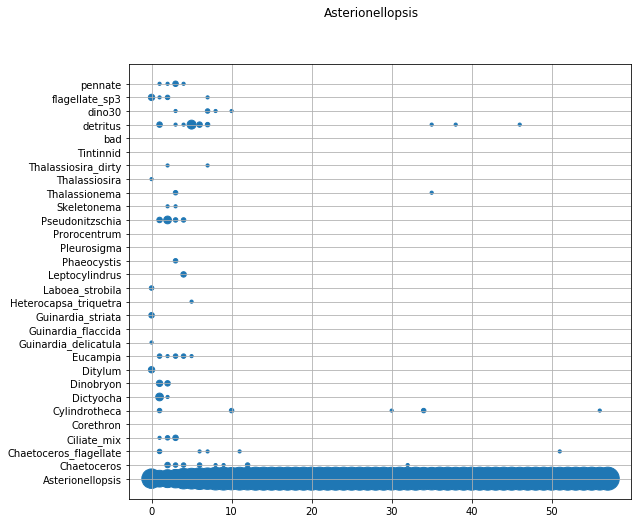

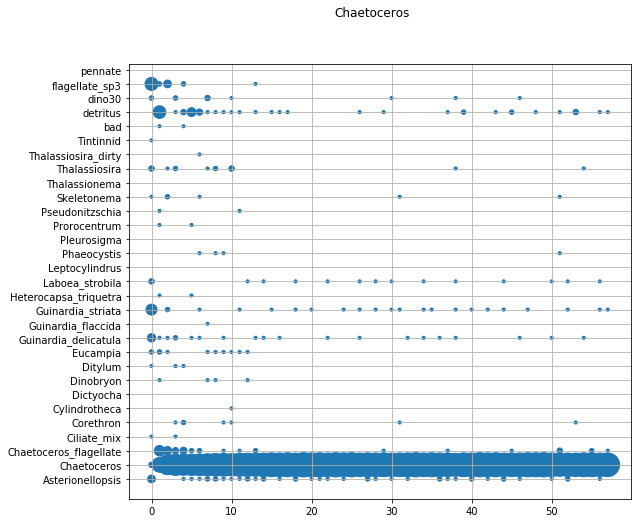

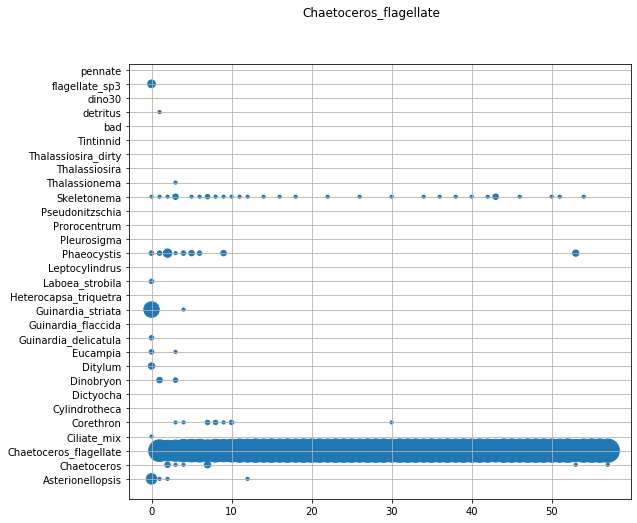

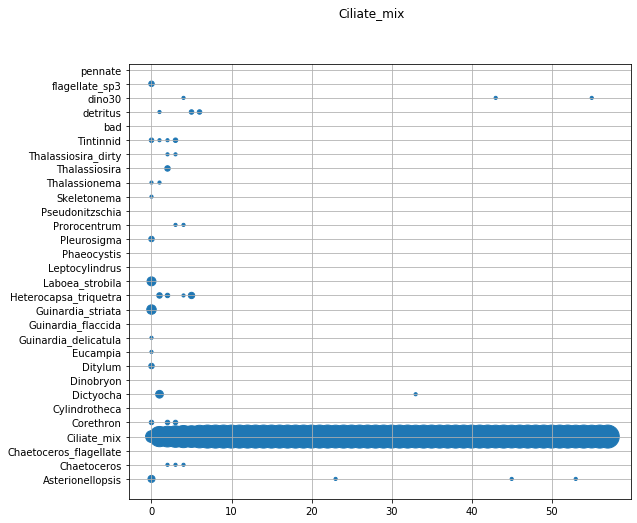

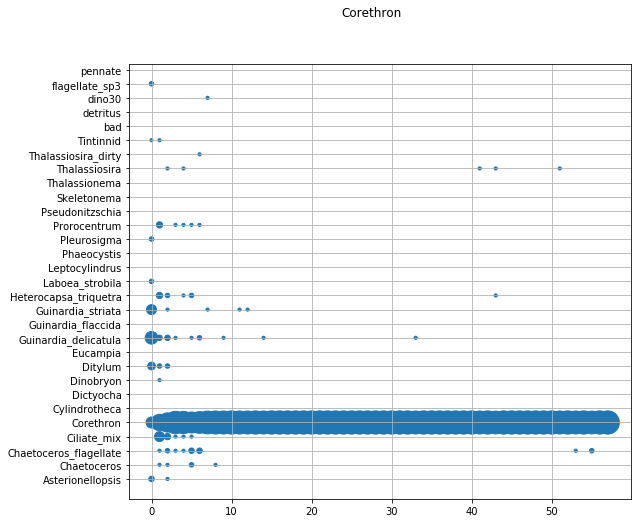

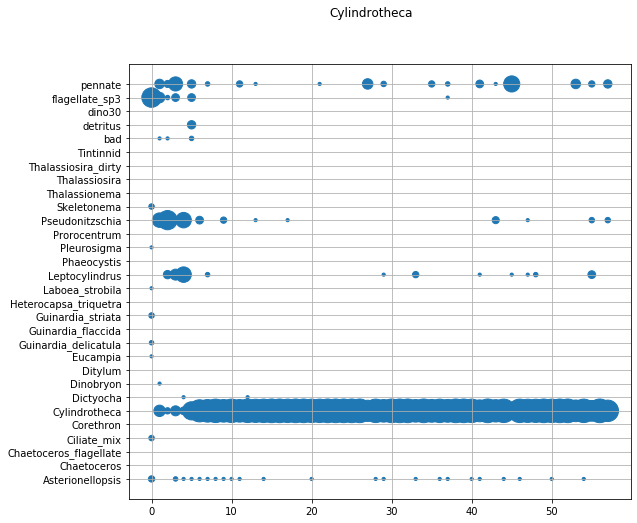

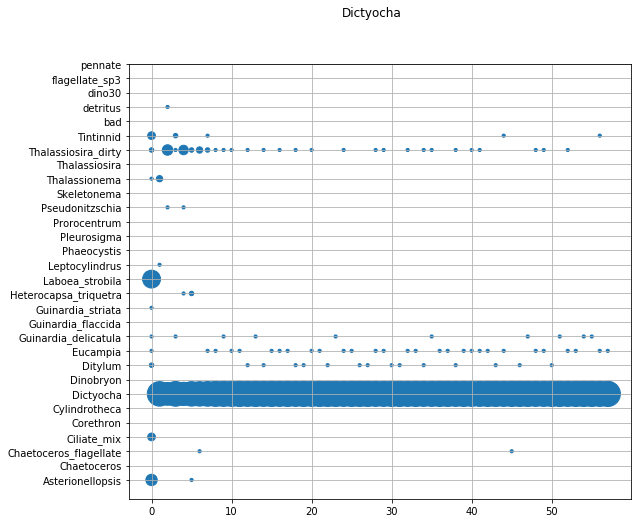

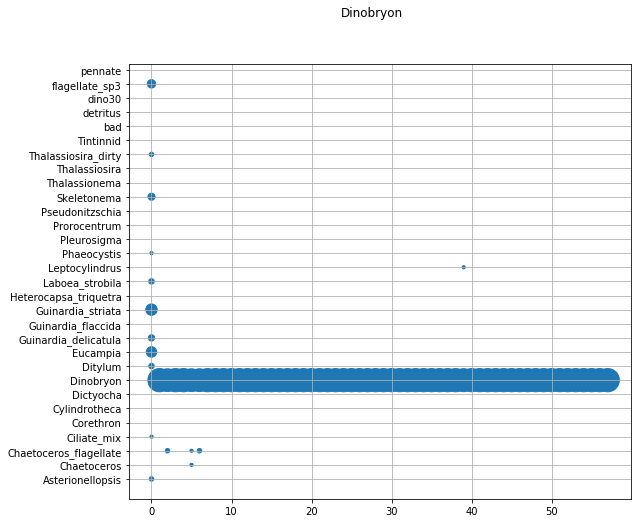

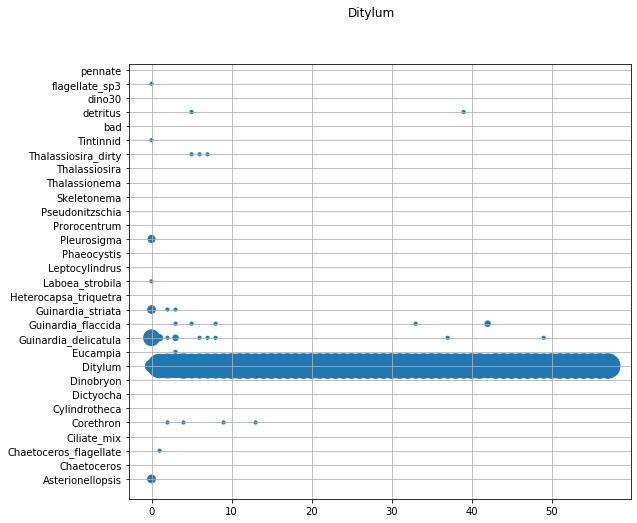

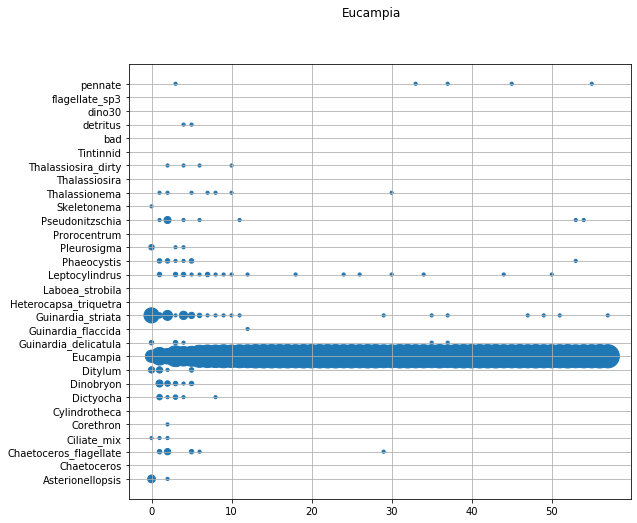

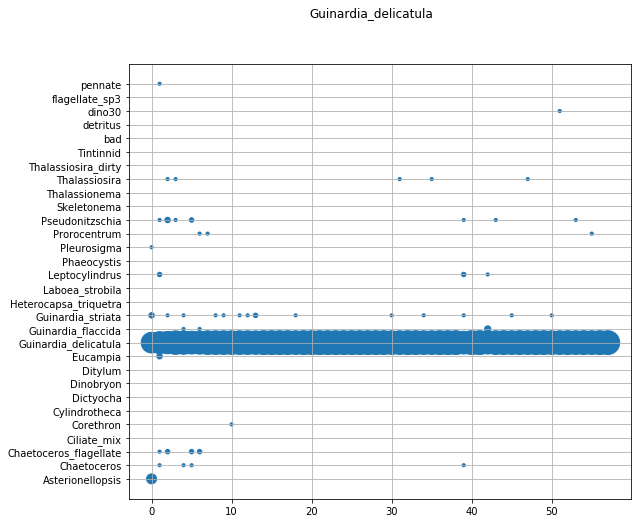

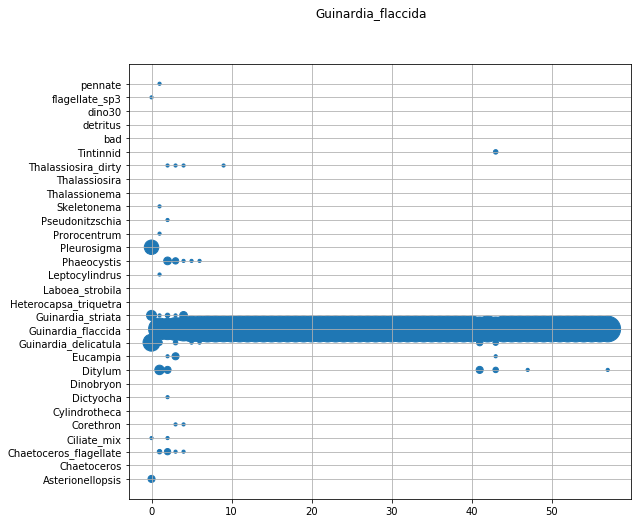

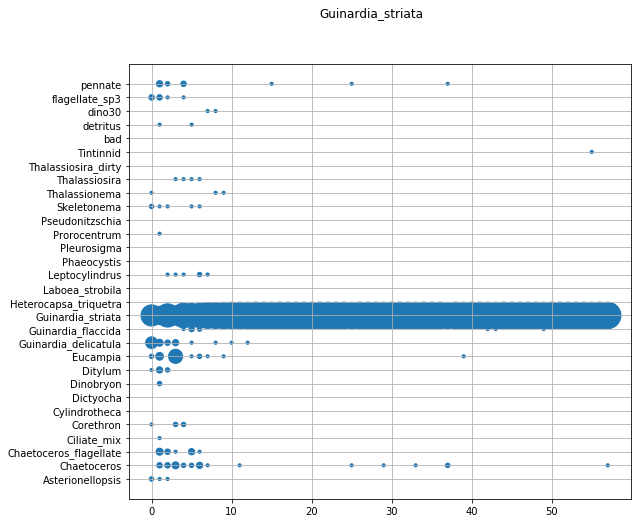

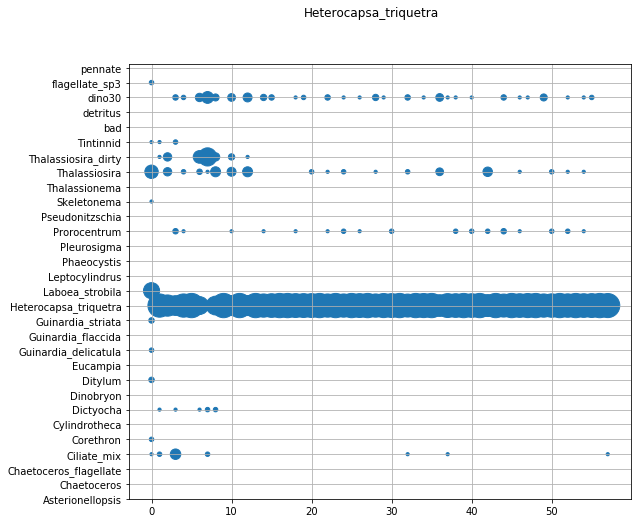

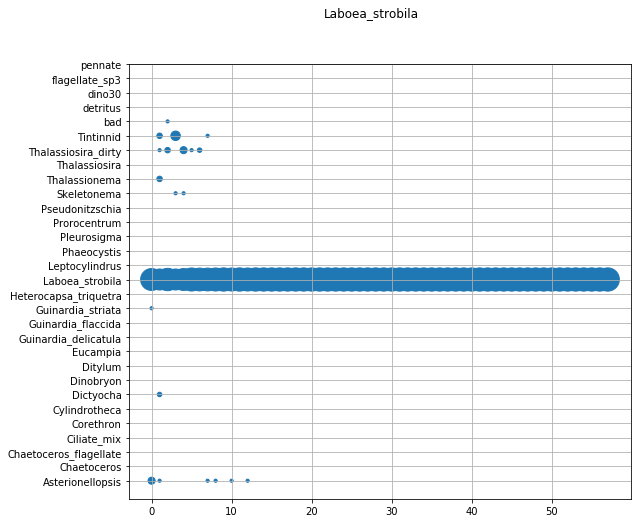

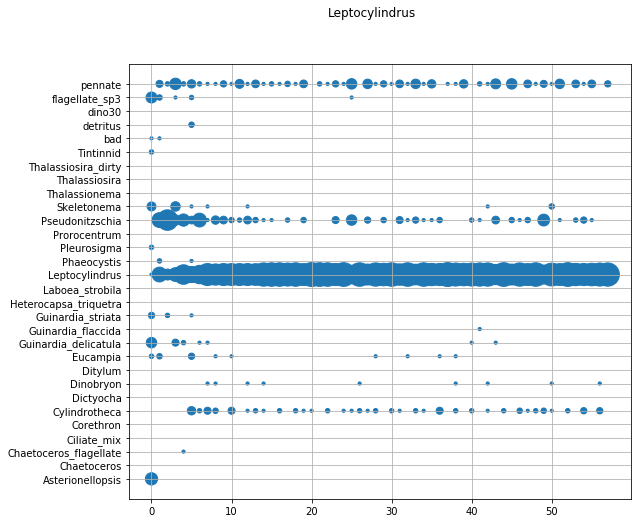

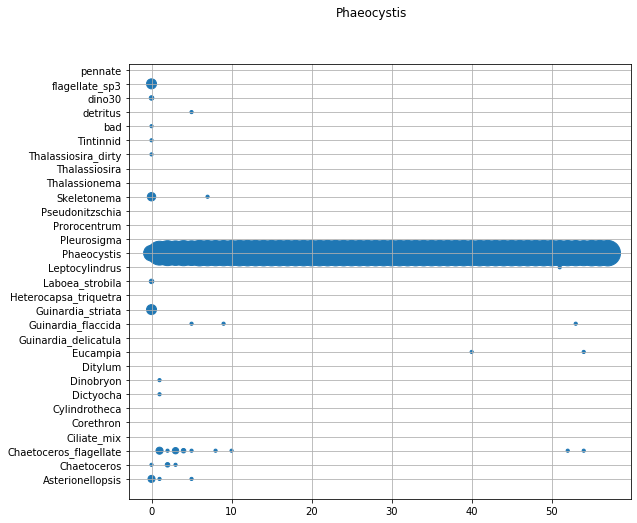

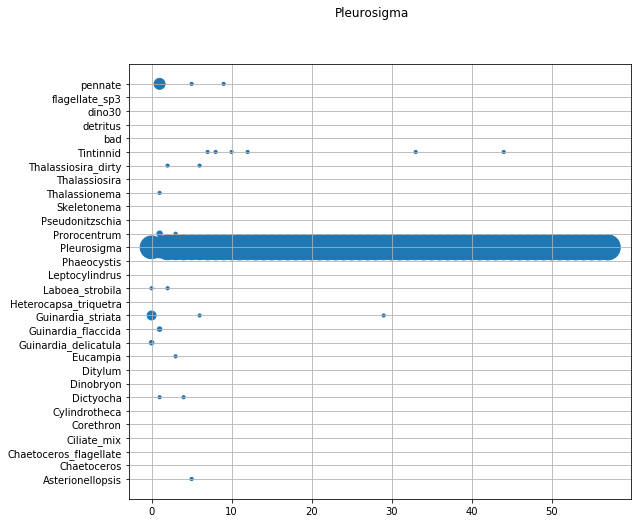

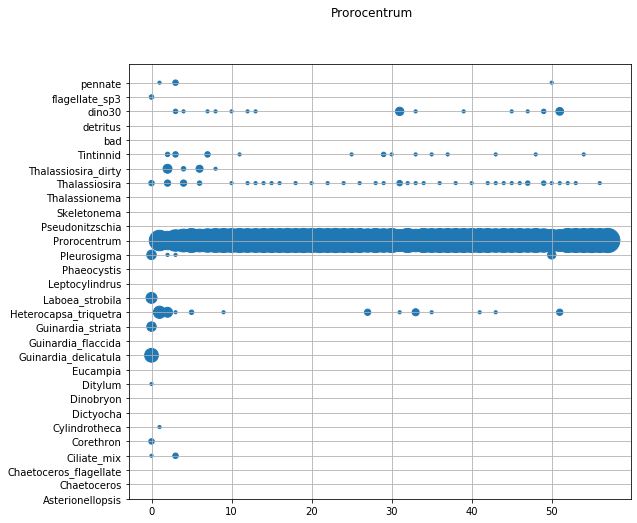

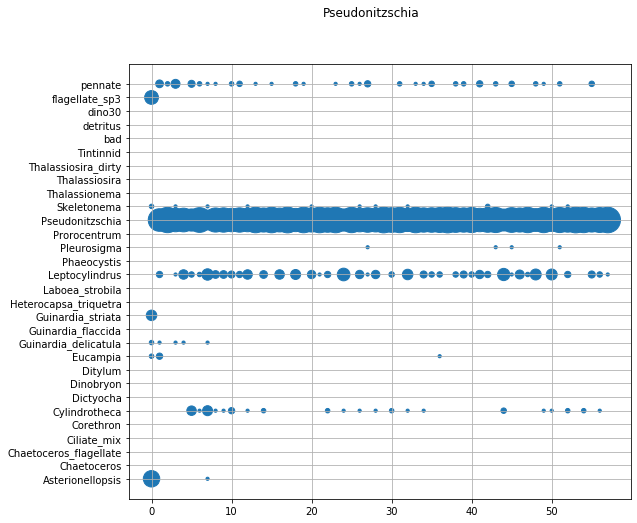

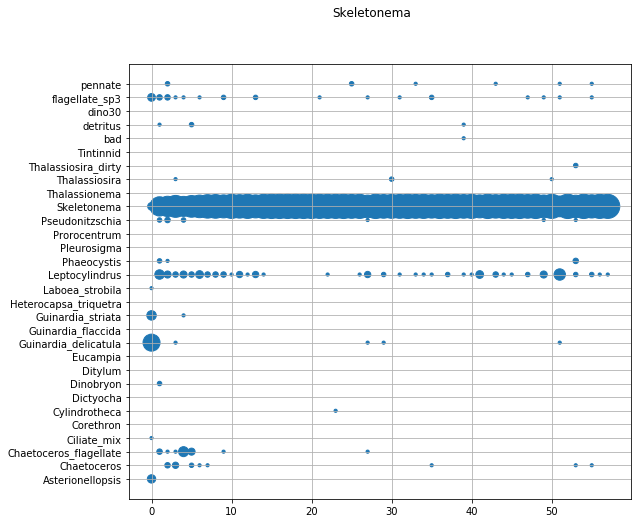

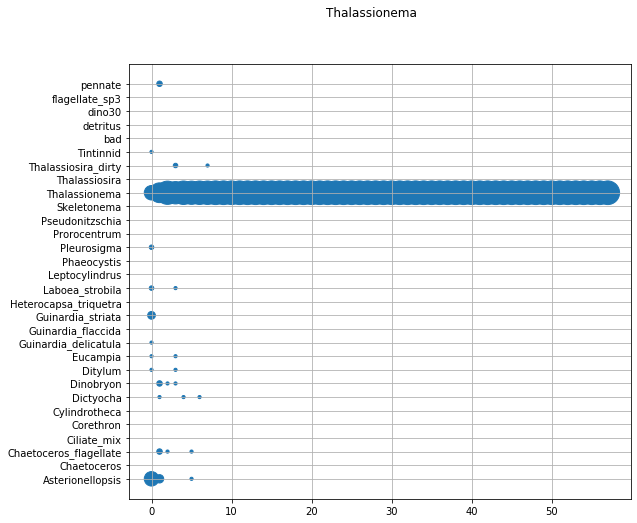

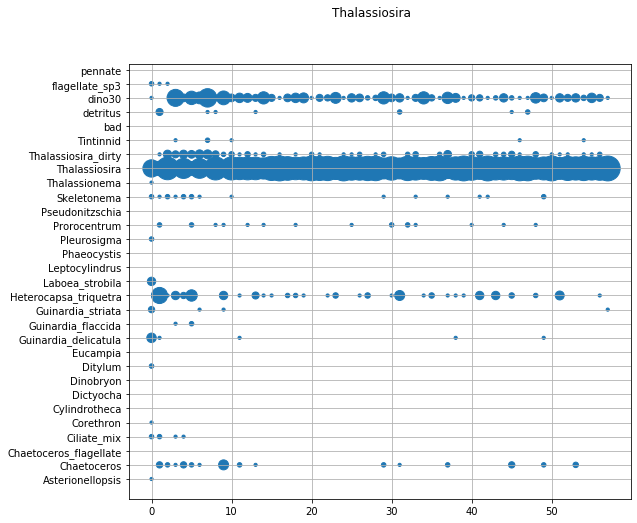

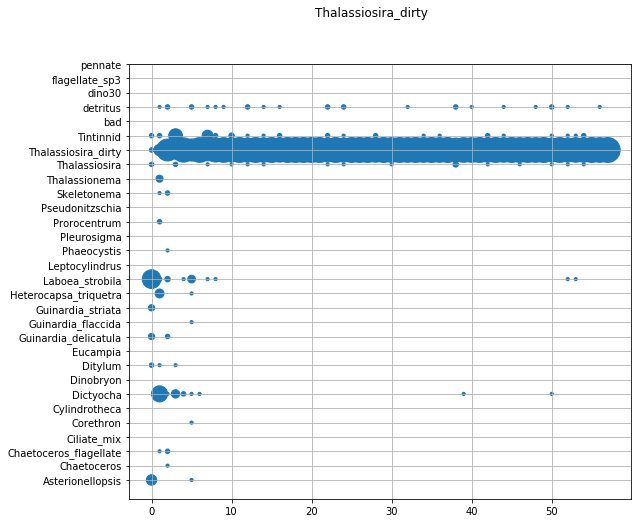

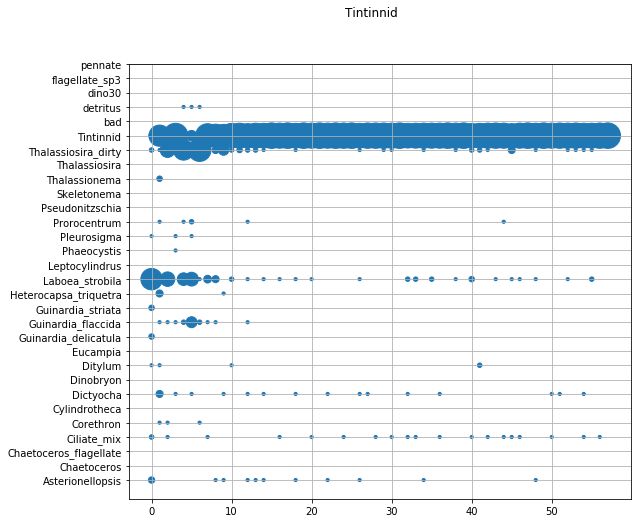

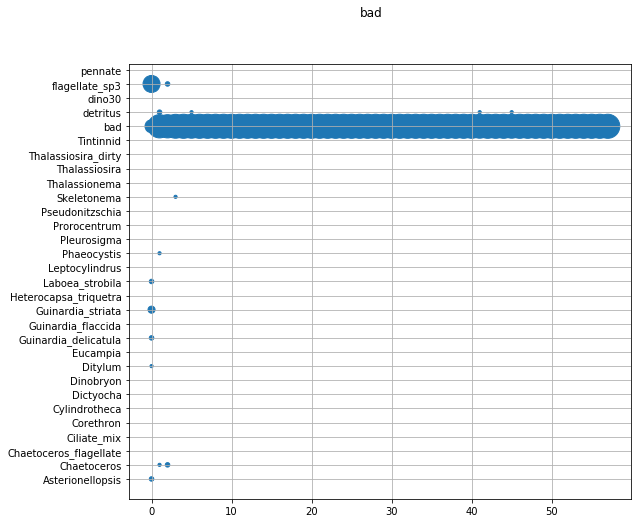

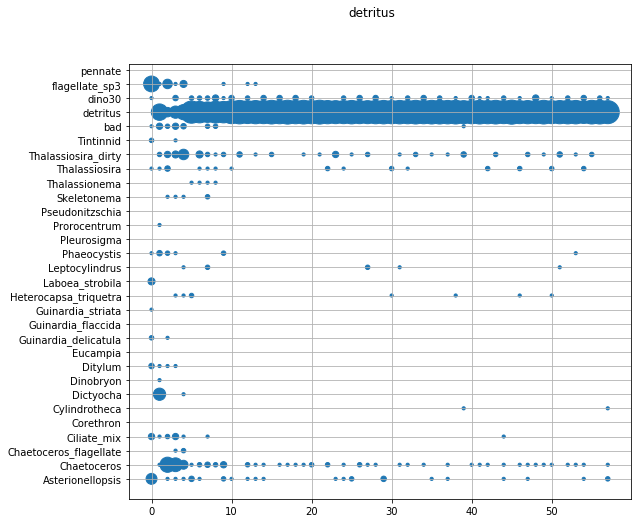

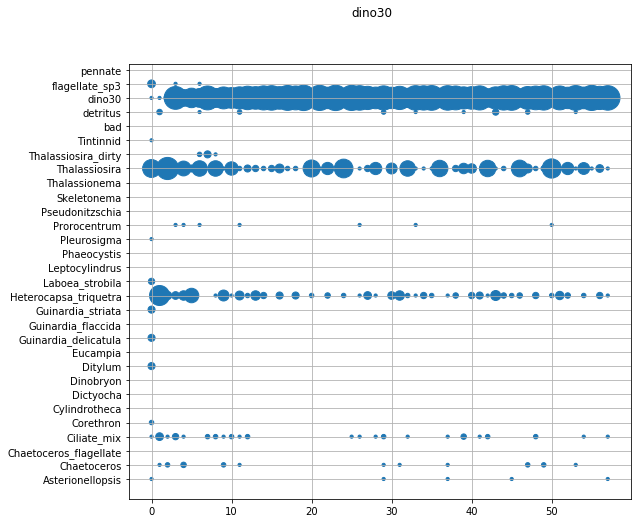

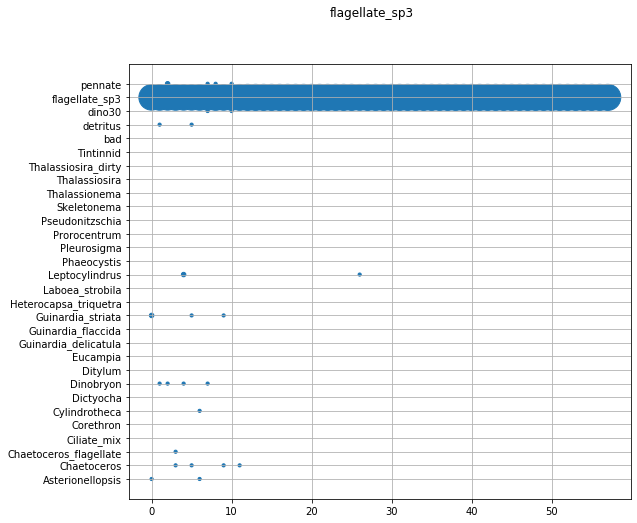

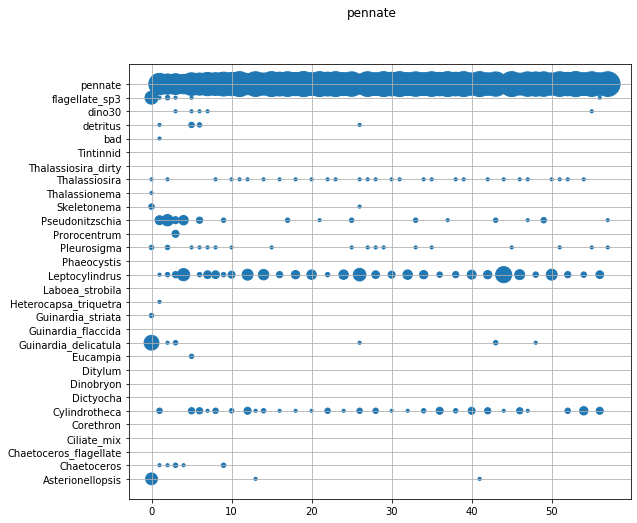

In [7]:
tr_t = np.array(stats_442["Tr_Trgt_Time"])
tr_p = np.array(stats_442["Tr_Pred_Time"])
cl = []
x = []
size = []
for i in range(0, 30):
    idxs = np.where(tr_t[0] == i)
    cl.append([])
    x.append([])
    size.append([])
    for j in range(len(tr_p)):
        y_vals, counts = np.unique(tr_p[j][idxs], return_counts=True)
        cl[i].extend(y_vals)
        x[i].extend([j]*len(y_vals))
        size[i].extend([10*c] for c in counts)

classnames = test_m.get_classnames(pp)
for i in range(30):
    fig = plt.figure(figsize=(9,8))
    fig.suptitle(classnames[i])
    plt.scatter(x[i], cl[i], size[i])
    plt.yticks(np.arange(0,30), classnames)
    plt.grid()


In [8]:
test_m.plot_CM(diff=False, preprocessor=pp, y=1.3)

NameError: name 'pp' is not defined

In [12]:
test_m.class_accuracies(pp)

{'Asterionellopsis': {'precision': 0.8,
  'recall': 0.7272727272727273,
  'f1-score': 0.761904761904762,
  'support': 22},
 'Chaetoceros': {'precision': 0.6071428571428571,
  'recall': 0.8095238095238095,
  'f1-score': 0.6938775510204083,
  'support': 21},
 'Chaetoceros_flagellate': {'precision': 0.8,
  'recall': 0.75,
  'f1-score': 0.7741935483870969,
  'support': 16},
 'Ciliate_mix': {'precision': 0.88,
  'recall': 0.7857142857142857,
  'f1-score': 0.830188679245283,
  'support': 28},
 'Corethron': {'precision': 0.9,
  'recall': 0.8181818181818182,
  'f1-score': 0.8571428571428572,
  'support': 22},
 'Cylindrotheca': {'precision': 0.8333333333333334,
  'recall': 0.8823529411764706,
  'f1-score': 0.8571428571428571,
  'support': 17},
 'Dictyocha': {'precision': 0.8947368421052632,
  'recall': 0.9444444444444444,
  'f1-score': 0.918918918918919,
  'support': 18},
 'Dinobryon': {'precision': 0.85,
  'recall': 0.8095238095238095,
  'f1-score': 0.8292682926829269,
  'support': 21},
 'Dity

In [14]:
train_m.class_accuracies(pp)

{'Asterionellopsis': {'precision': 0.9298245614035088,
  'recall': 1.0,
  'f1-score': 0.9636363636363636,
  'support': 53},
 'Chaetoceros': {'precision': 0.9821428571428571,
  'recall': 0.9322033898305084,
  'f1-score': 0.9565217391304348,
  'support': 59},
 'Chaetoceros_flagellate': {'precision': 1.0,
  'recall': 0.9818181818181818,
  'f1-score': 0.9908256880733944,
  'support': 55},
 'Ciliate_mix': {'precision': 0.9814814814814815,
  'recall': 1.0,
  'f1-score': 0.9906542056074767,
  'support': 53},
 'Corethron': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 54},
 'Cylindrotheca': {'precision': 0.9016393442622951,
  'recall': 0.9821428571428571,
  'f1-score': 0.9401709401709402,
  'support': 56},
 'Dictyocha': {'precision': 0.984375,
  'recall': 0.9692307692307692,
  'f1-score': 0.9767441860465116,
  'support': 65},
 'Dinobryon': {'precision': 0.9818181818181818,
  'recall': 1.0,
  'f1-score': 0.9908256880733944,
  'support': 54},
 'Ditylum': {'precision': 1.0, 

In [15]:
valid_m.class_accuracies(pp)

{'Asterionellopsis': {'precision': 0.8571428571428571,
  'recall': 0.72,
  'f1-score': 0.782608695652174,
  'support': 25},
 'Chaetoceros': {'precision': 0.6,
  'recall': 0.45,
  'f1-score': 0.5142857142857143,
  'support': 20},
 'Chaetoceros_flagellate': {'precision': 0.7916666666666666,
  'recall': 0.6551724137931034,
  'f1-score': 0.7169811320754716,
  'support': 29},
 'Ciliate_mix': {'precision': 0.7,
  'recall': 0.7368421052631579,
  'f1-score': 0.717948717948718,
  'support': 19},
 'Corethron': {'precision': 0.9565217391304348,
  'recall': 0.9166666666666666,
  'f1-score': 0.9361702127659574,
  'support': 24},
 'Cylindrotheca': {'precision': 0.8275862068965517,
  'recall': 0.8888888888888888,
  'f1-score': 0.8571428571428572,
  'support': 27},
 'Dictyocha': {'precision': 0.8095238095238095,
  'recall': 1.0,
  'f1-score': 0.8947368421052632,
  'support': 17},
 'Dinobryon': {'precision': 0.9047619047619048,
  'recall': 0.76,
  'f1-score': 0.8260869565217391,
  'support': 25},
 'Dit

In [11]:
test_m.sample_diff(15,classname="bad", preprocessor=pp, fname=stats_442['Test_fnames'], probs=stats_442['Test_outs'])

(array([], dtype=int64), array([], dtype=int64), [])

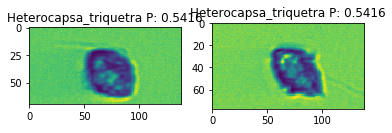

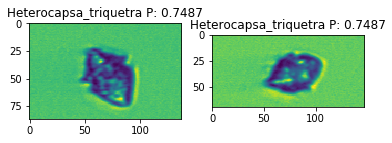

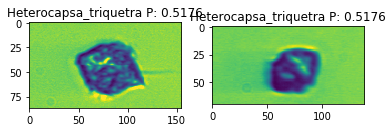

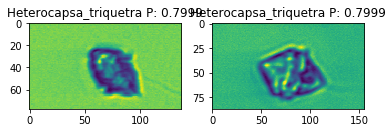

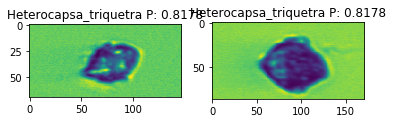

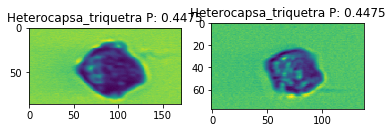

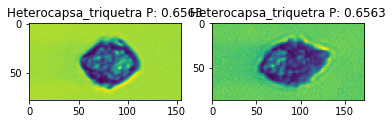

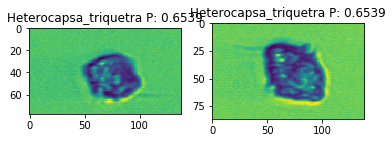

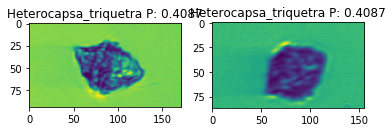

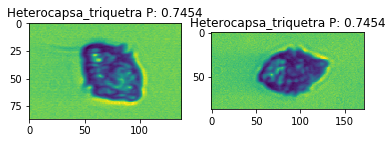

(array([13, 13, 13, 13, 13, 13, 13, 13, 13, 13]),
 array([13, 13, 13, 13, 13, 13, 13, 13, 13, 13]),
 ['0.5416',
  '0.5416',
  '0.7487',
  '0.7487',
  '0.5176',
  '0.5176',
  '0.7999',
  '0.7999',
  '0.8178',
  '0.8178',
  '0.4475',
  '0.4475',
  '0.6563',
  '0.6563',
  '0.6539',
  '0.6539',
  '0.4087',
  '0.4087',
  '0.7454',
  '0.7454'])

In [12]:
test_m.sample_same(10,classname="Heterocapsa_triquetra", preprocessor=pp, fname=stats_442['Test_fnames'], probs=stats_442['Test_outs'])

testAcc 0.9130360205831904


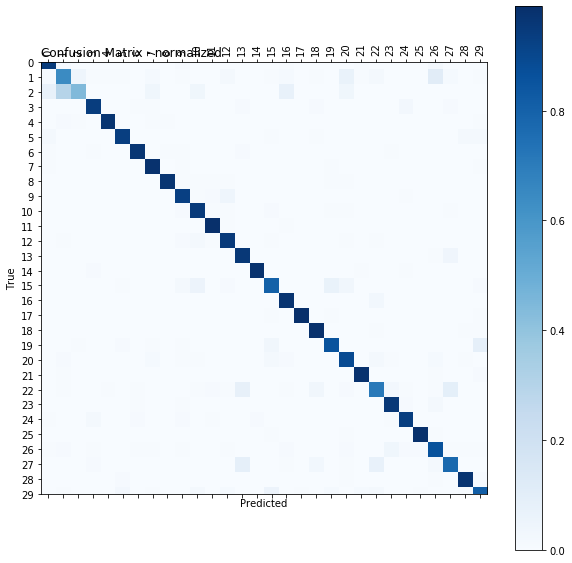

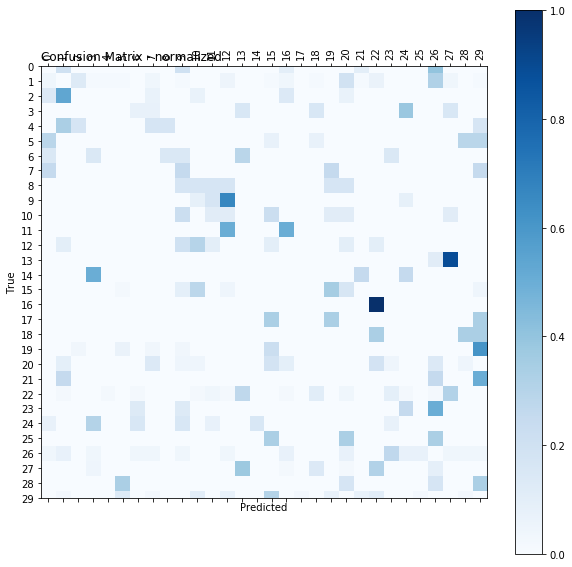

In [24]:
# original googlenet. problems.
stats = load_json_from_file("stats/stats-GoogleNet_1.2-4.2.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc']}
print("testAcc", stats['TestAcc'])

test_m = Metrics(stats['Test_Target'], stats['Test_Pred'])
test_m.plot_CM(diff=False)
test_m.plot_CM(diff=True)

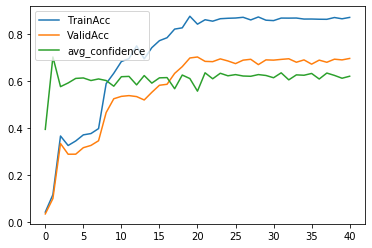

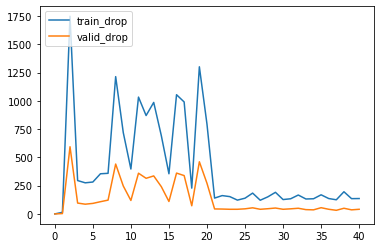

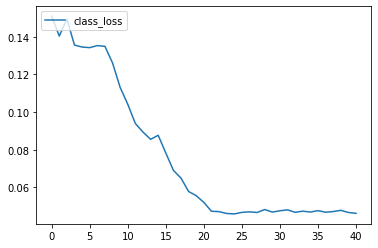

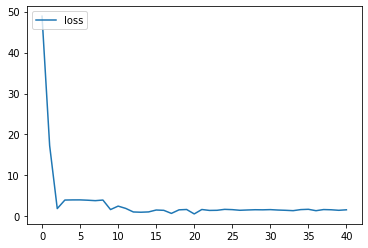

testAcc 0.7096774193548387
Test dropped: 104 / 1880.0


In [18]:
stats = load_json_from_file("stats/stats-GoogleNet_5.3-13.9.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)

print("Test dropped:", len(stats['Test_dropped_fnames']),"/", 100*94*0.2)

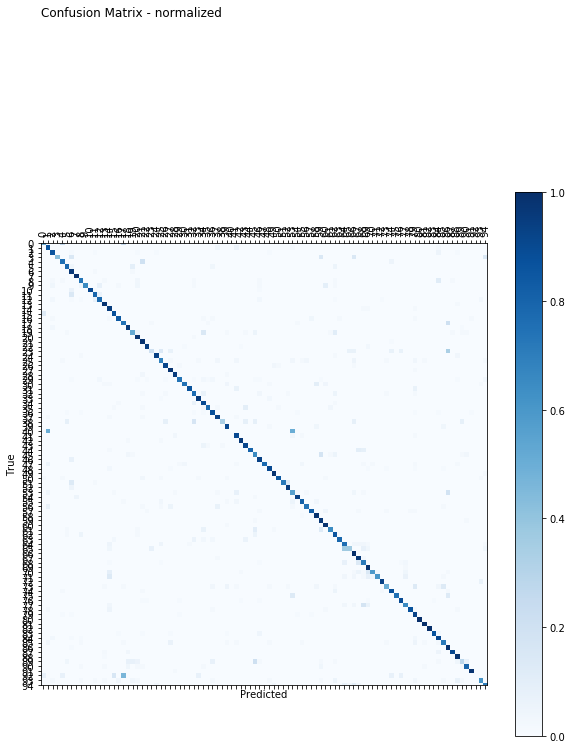

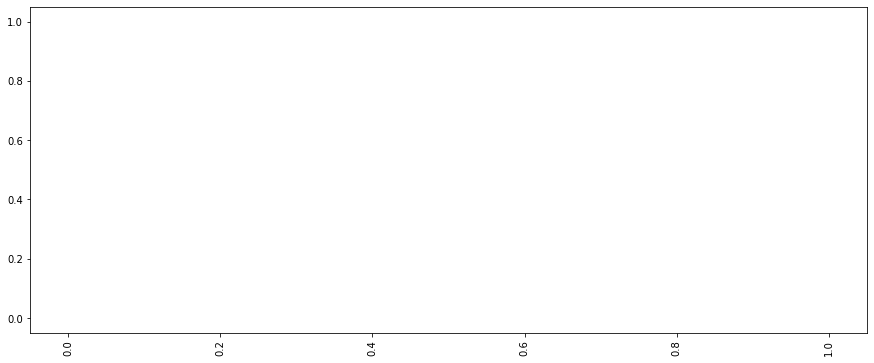

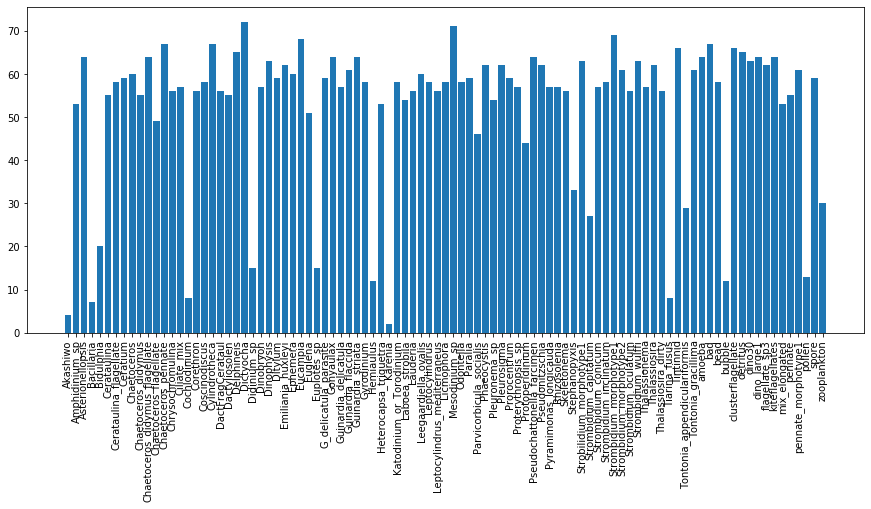

0
4995


In [37]:
stats = load_json_from_file("stats/stats-GoogleNet_5.8-13.51.json")

test_m = Metrics(stats["Train_Target"], stats["Train_Pred"])

test_m.plot_CM(y = 1.5)
dropped_train = FileHandler(stats['Train_dropped_fnames'])
notD_train = FileHandler(stats['Train_fnames'])

dropped_train.plot_counts()
notD_train.plot_counts()

print(dropped_train.get_total_count())
print(notD_train.get_total_count())

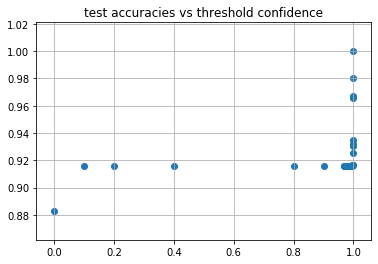

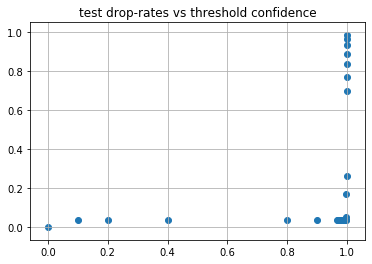

In [4]:
# with 5.3 13.52, i changed the test_conf_threshold and got the following results

base_name = "stats/stats-GoogleNet_5.3-13.7.json"

snames = [base_name.replace("7", str(i)) for i in range(71, 76)]
snames.insert(0, base_name)

snames.append(base_name.replace("7", "6"))
snames.extend([base_name.replace("7", str(i)) for i in range(61, 65)])

snames.extend([base_name.replace("7", str(i)) for i in range(641, 650)])

snames.append(base_name.replace("7", "65"))
snames.extend([base_name.replace("7", str(i)) for i in range(651, 657)])


confs = [0,0.1,0.2,0.4,0.8,0.9,   0.9675,0.97,0.975,0.98,0.99,   
         0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,   
         0.9991,0.9992,0.9993,0.9994,0.9995,0.9996,0.9997]

#confs = [0.9675, 0.970, 0.975, 0.98, 0.99, 0.999, 0.9999, 0.99999, 0.999999]
#confs.extend([0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998])
#log_confs = [math.log10(x) for x in confs]
gns = [load_json_from_file(f) for f in snames]

test_accs = [gn['TestAcc'] for gn in gns]

dropped_test = [FileHandler(gn['Test_dropped_fnames']) for gn in gns]
dr_test_accs = [(fh.get_total_count()/(29149*0.2)) for fh in dropped_test]

plt.scatter(confs, test_accs)
plt.title("test accuracies vs threshold confidence")
plt.grid(b=True, which='both')
plt.show()

plt.scatter(confs, dr_test_accs)
plt.title("test drop-rates vs threshold confidence")
plt.grid(b=True, which='both')
plt.show()



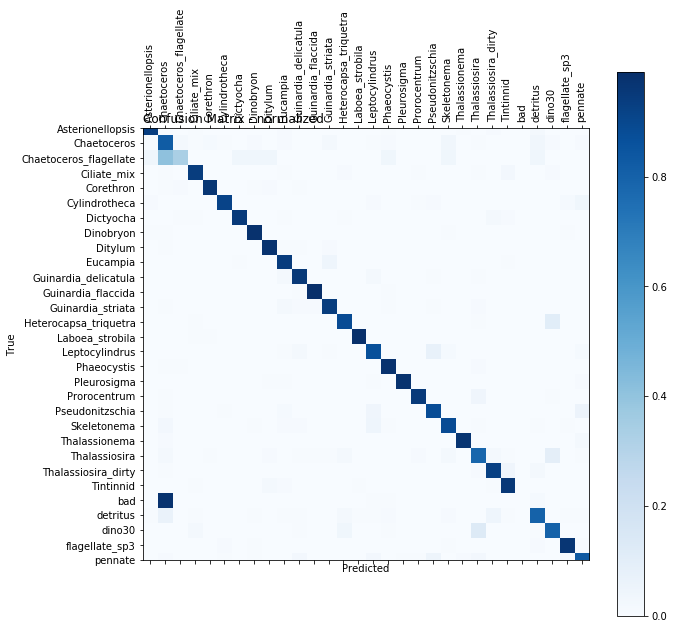

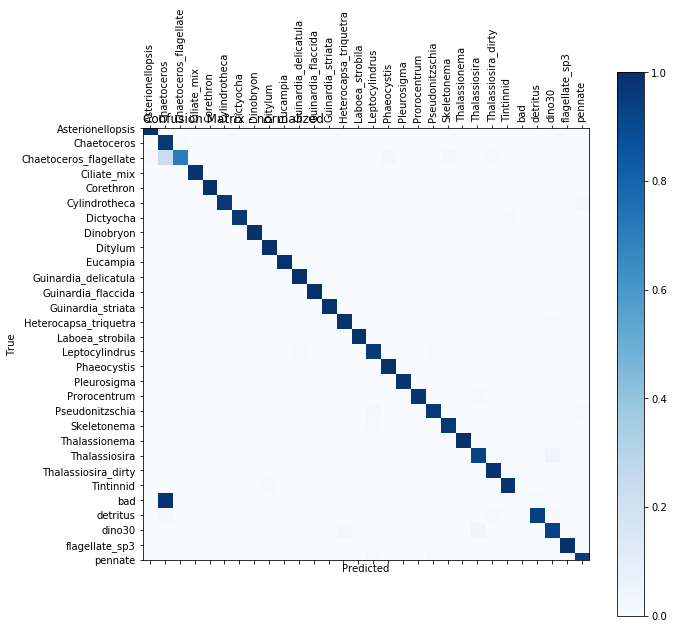

In [20]:
test_m = Metrics(gns[0]['Test_Target'], gns[0]['Test_Pred'])
train_m = Metrics(gns[0]['Train_Target'], gns[0]['Train_Pred'])

test_m.plot_CM(pp)
train_m.plot_CM(pp)

In [52]:
drp_outs = np.array(gns[1]["Test_dropped_outs"])
gns[1]["Test_dropped_confs"][:26]
np.where(np.argmax(drp_outs, 1) != 1)

(array([ 26, 109]),)

In [13]:
train_Met = [Metrics(gn['Train_Target'], gn['Train_Pred']) for gn in gns]
valid_Met = [Metrics(gn['Valid_Target'], gn['Valid_Pred']) for gn in gns]


dropped_train = [FileHandler(gn['Train_dropped_fnames']) for gn in gns]
nD_train = [FileHandler(gn['Train_fnames']) for gn in gns]

dropped_valid = [FileHandler(gn['Valid_dropped_fnames']) for gn in gns]
nD_valid = [FileHandler(gn['Valid_fnames']) for gn in gns]

dropped_test = [FileHandler(gn['Test_dropped_fnames']) for gn in gns]
nD_test = [FileHandler(gn['Test_fnames']) for gn in gns]

dr_test_accs = [(fh.get_total_count()/(29149*0.2)) for fh in dropped_test]

print(dr_test_accs)
for i in range(len(dropped_train)):
    print("confs - "+str(confs[i]))
    
    s = dropped_train[i].get_total_count()
    print("dropped train:", s, "%:", s/(29149*0.6))
    

    s = dropped_valid[i].get_total_count()
    print("dropped valid:",s, "%:", s/(29149*0.2))
    

    s = dropped_test[i].get_total_count()
    print("dropped test:",s, "%:", s/(29149*0.2))
  
    
    print("train acc:", train_Met[i].accuracy())
    print("valid acc:", valid_Met[i].accuracy())
    print("test acc:", gns[i]['TestAcc'])
    
    print()

    

[0.0, 0.0, 0.0, 0.0, 0.0020583896531613435, 0.47840406188891554, 0.7641771587361488, 0.9007170057291846, 0.9542351367113794]
confs - 0.9675
dropped train: 0 %: 0.0
dropped valid: 0 %: 0.0
dropped test: 0 %: 0.0
train acc: 0.7065012293441592
valid acc: 0.6945111492281304
test acc: 0.7077186963979417

confs - 0.97
dropped train: 0 %: 0.0
dropped valid: 0 %: 0.0
dropped test: 0 %: 0.0
train acc: 0.7065012293441592
valid acc: 0.6945111492281304
test acc: 0.7077186963979417

confs - 0.975
dropped train: 0 %: 0.0
dropped valid: 0 %: 0.0
dropped test: 0 %: 0.0
train acc: 0.7065012293441592
valid acc: 0.6945111492281304
test acc: 0.7077186963979417

confs - 0.98
dropped train: 0 %: 0.0
dropped valid: 0 %: 0.0
dropped test: 0 %: 0.0
train acc: 0.7065012293441592
valid acc: 0.6945111492281304
test acc: 0.7077186963979417

confs - 0.99
dropped train: 39 %: 0.0022299221242581225
dropped valid: 20 %: 0.0034306494219355724
dropped test: 12 %: 0.0020583896531613435
train acc: 0.7075071633237823
valid

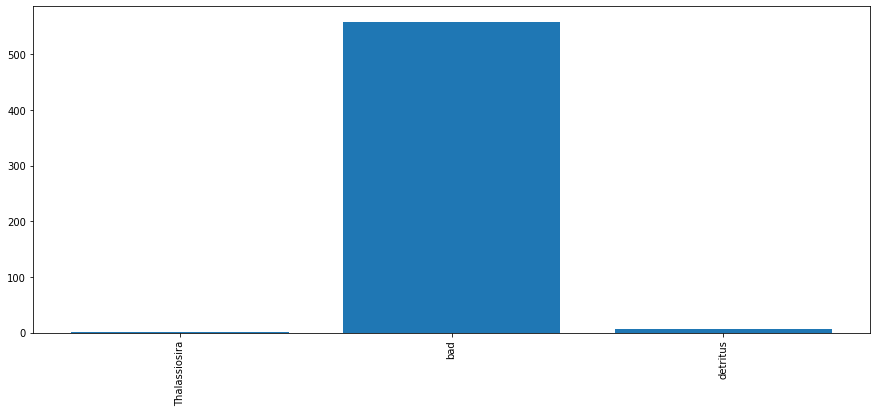

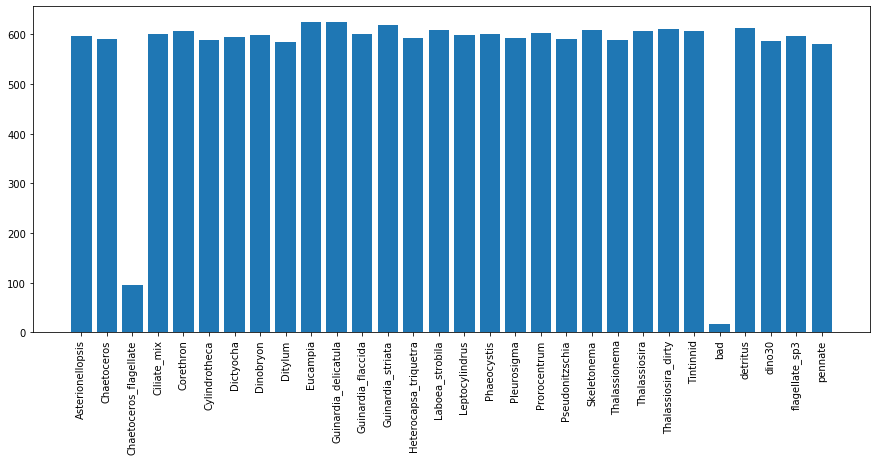

class bad : count = 558
class detritus : count = 6
class Thalassiosira : count = 1
class Heterocapsa_triquetra : count = 592
class Phaeocystis : count = 600
class Guinardia_delicatula : count = 625
class pennate : count = 581
class Corethron : count = 607
class Tintinnid : count = 607
class Pseudonitzschia : count = 590
class Ditylum : count = 585
class dino30 : count = 586
class Guinardia_flaccida : count = 601
class Asterionellopsis : count = 596
class flagellate_sp3 : count = 596
class Guinardia_striata : count = 619
class Thalassionema : count = 589
class Laboea_strobila : count = 609
class Thalassiosira : count = 606
class Cylindrotheca : count = 588
class detritus : count = 613
class Skeletonema : count = 608
class Dictyocha : count = 594
class Chaetoceros : count = 591
class Thalassiosira_dirty : count = 611
class Eucampia : count = 625
class Leptocylindrus : count = 599
class Dinobryon : count = 598
class Ciliate_mix : count = 601
class Prorocentrum : count = 603
class Chaetoce

In [6]:
stats = load_json_from_file("stats/stats-GoogleNet_5.3-13.71.json")

dropped_train = FileHandler(stats['Train_dropped_fnames'])
notD_train = FileHandler(stats['Train_fnames'])

dropped_train.plot_counts()
notD_train.plot_counts()

dropped_train.get_counts()
notD_train.get_counts()

In [ ]:
test_M.

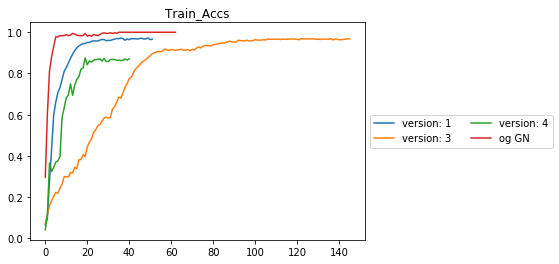

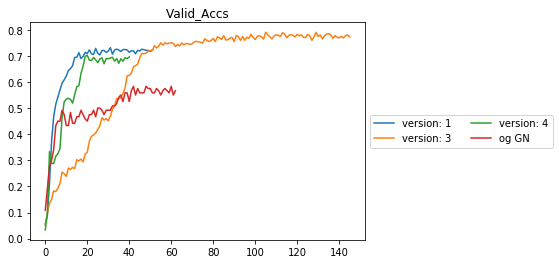

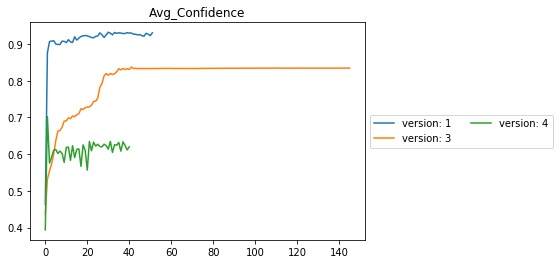

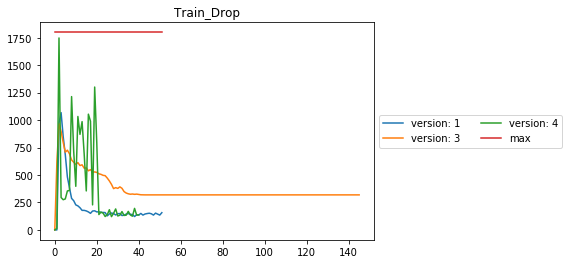

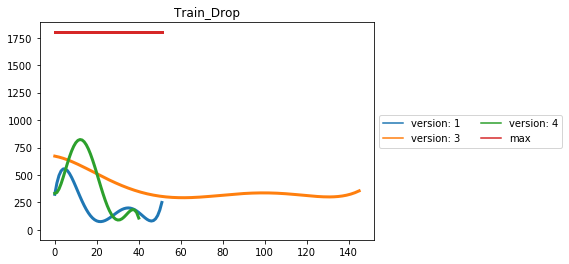

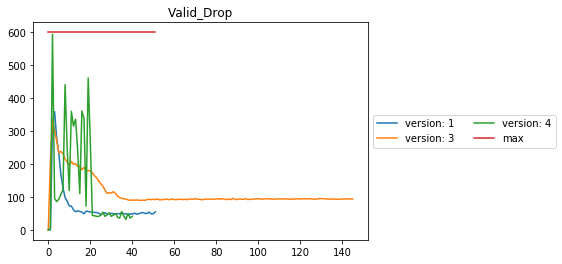

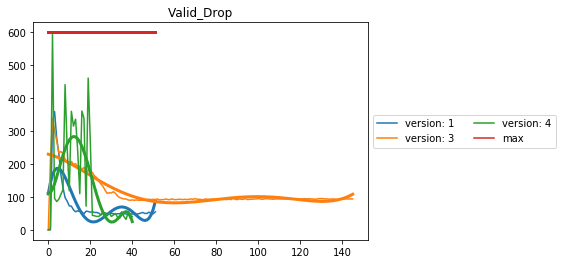

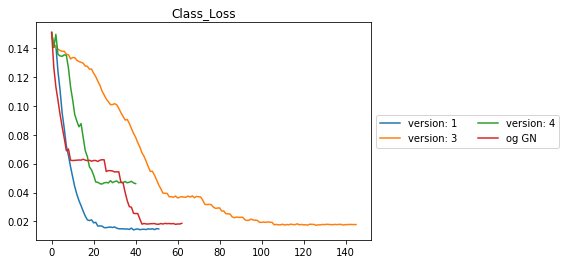

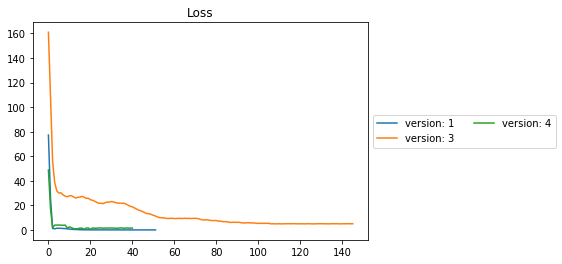

In [23]:
# comparison of different confidence loss function versions. version 1, 3, 4. all with lambda=1, 100 images/class. 30 classes


gn_12_441 = load_json_from_file("stats/stats-GoogleNet_1.2-4.41.json")
gn_53_13128 = "stats/stats-GoogleNet_5.3-13.128.json"

name = "stats/stats-GoogleNet_5.3-13.01.json"
fname = [name]
fname.append(name.replace("01", "51"))
fname.append(name.replace("01", "9"))


version = [1,3,4]

gns = [load_json_from_file(f) for f in fname]

Train_Accs = {"version: "+str(version[i]): gns[i]['TrainAcc'] for i in range(len(gns))}

Train_Accs['og GN'] = gn_12_441['TrainAcc']

Valid_Accs = {"version: "+str(version[i]): gns[i]['ValidAcc'] for i in range(len(gns))}

Valid_Accs['og GN'] = gn_12_441['ValidAcc']

avg_conf = {"version: "+str(version[i]): gns[i]['avg_confidence'] for i in range(len(gns))}

train_drop = {"version: "+str(version[i]): gns[i]['train_drop'] for i in range(len(gns))}
train_drop['max'] = [100*30*0.6 for x in range(len(train_drop['version: '+str(version[0])]))]

valid_drop = {"version: "+str(version[i]): gns[i]['valid_drop'] for i in range(len(gns))}
valid_drop['max'] = [100*30*0.2 for x in range(len(valid_drop['version: '+str(version[0])]))]

class_loss = {"version: "+str(version[i]): gns[i]['class_loss'] for i in range(len(gns))}
class_loss['og GN'] = gn_12_441['loss']

overall_loss = {"version: "+str(version[i]): gns[i]['loss'] for i in range(len(gns))}


Metrics.plot_series(Train_Accs, "Train_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(Valid_Accs, "Valid_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(avg_conf, "Avg_Confidence", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, True))
Metrics.plot_series(class_loss, "Class_Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(overall_loss, "Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))

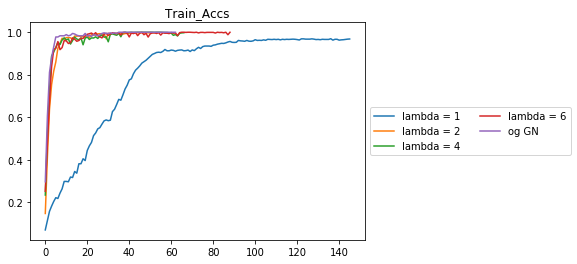

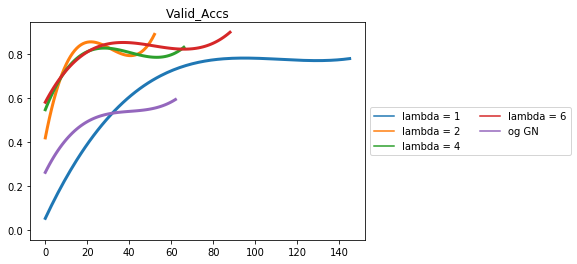

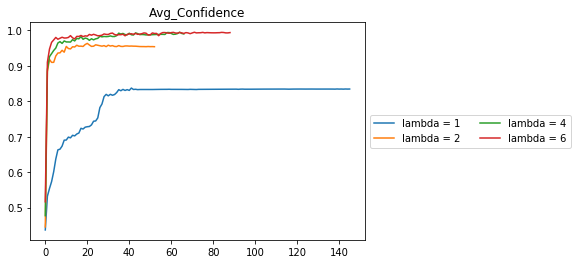

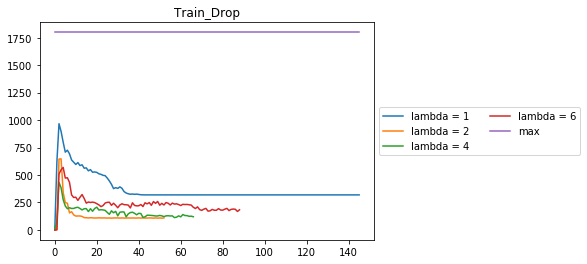

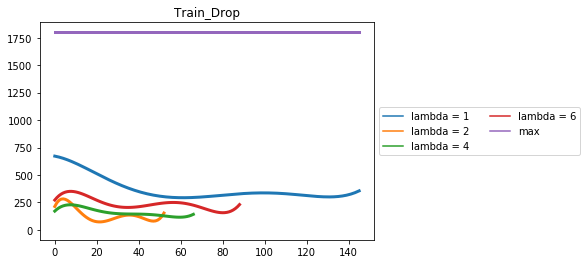

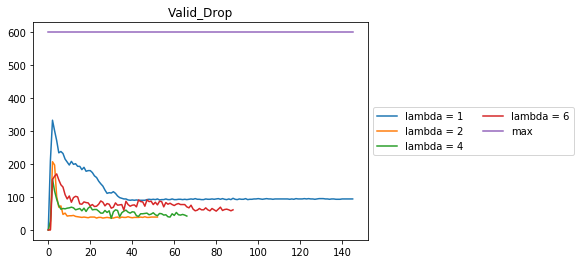

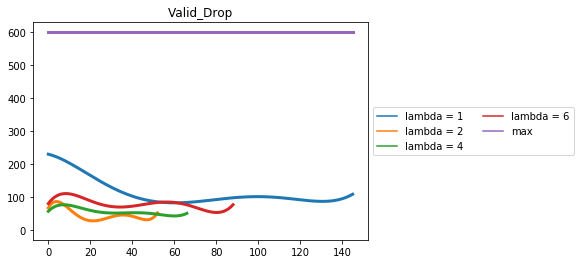

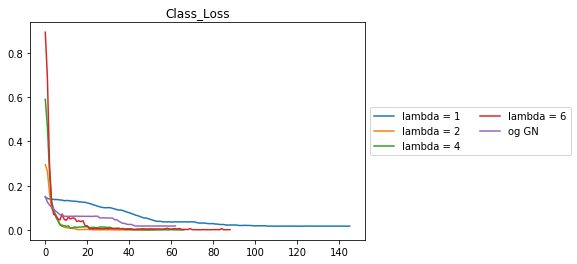

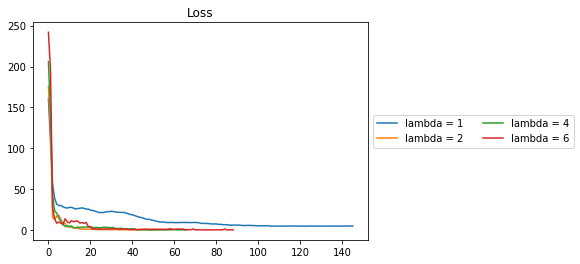

In [11]:
gn_12_441 = load_json_from_file("stats/stats-GoogleNet_1.2-4.41.json")
gn_53_13128 = "stats/stats-GoogleNet_5.3-13.128.json"

name = "stats/stats-GoogleNet_5.3-13.81.json"
fname = [name.replace("81",str(i)) for i in range(81,83)]
fname.insert(0, name.replace("81", "8"))
fname.insert(0, name.replace("81", "51"))


lambdas = [1,2,4,6]

gns = [load_json_from_file(f) for f in fname]

Train_Accs = {"lambda = "+str(lambdas[i]): gns[i]['TrainAcc'] for i in range(len(gns))}

Train_Accs['og GN'] = gn_12_441['TrainAcc']

Valid_Accs = {"lambda = "+str(lambdas[i]): gns[i]['ValidAcc'] for i in range(len(gns))}

Valid_Accs['og GN'] = gn_12_441['ValidAcc']

avg_conf = {"lambda = "+str(lambdas[i]): gns[i]['avg_confidence'] for i in range(len(gns))}

train_drop = {"lambda = "+str(lambdas[i]): gns[i]['train_drop'] for i in range(len(gns))}
train_drop['max'] = [100*30*0.6 for x in range(len(train_drop['lambda = '+str(lambdas[0])]))]

valid_drop = {"lambda = "+str(lambdas[i]): gns[i]['valid_drop'] for i in range(len(gns))}
valid_drop['max'] = [100*30*0.2 for x in range(len(valid_drop['lambda = '+str(lambdas[0])]))]

class_loss = {"lambda = "+str(lambdas[i]): gns[i]['class_loss'] for i in range(len(gns))}
class_loss['og GN'] = gn_12_441['loss']

overall_loss = {"lambda = "+str(lambdas[i]): gns[i]['loss'] for i in range(len(gns))}


Metrics.plot_series(Train_Accs, "Train_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(Valid_Accs, "Valid_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(3, False))
Metrics.plot_series(avg_conf, "Avg_Confidence", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(class_loss, "Class_Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(overall_loss, "Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))

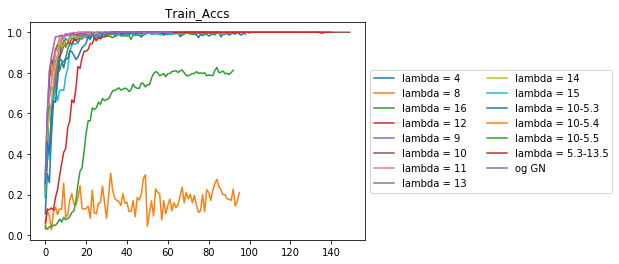

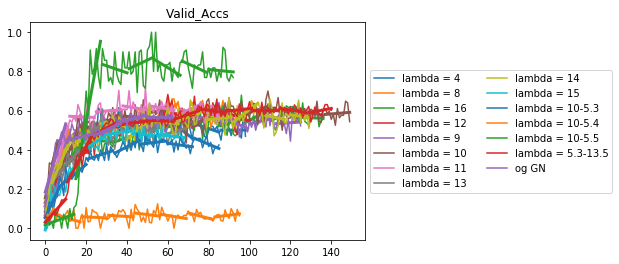

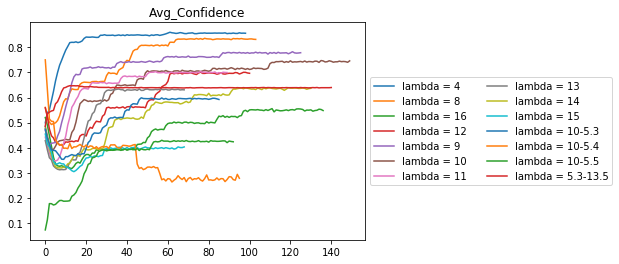

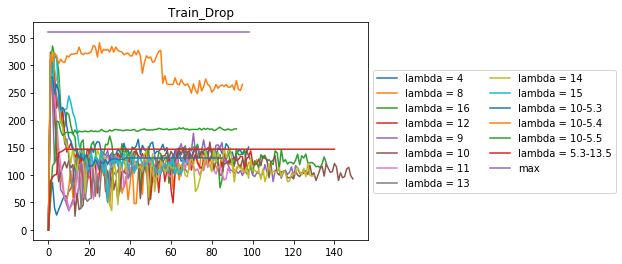

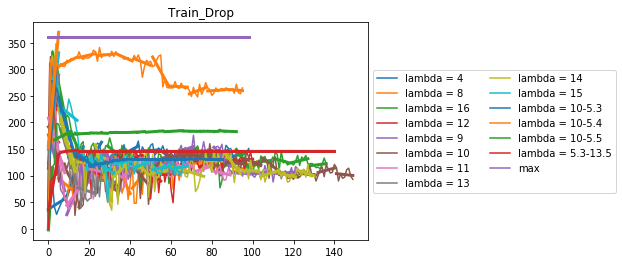

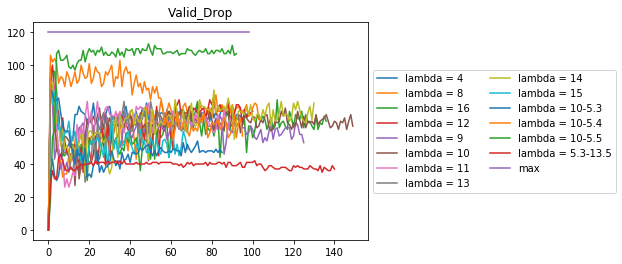

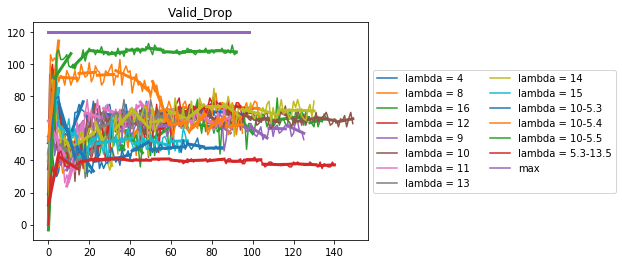

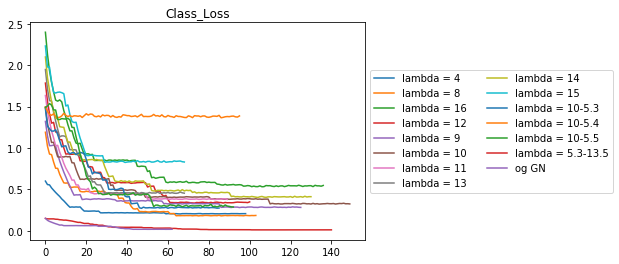

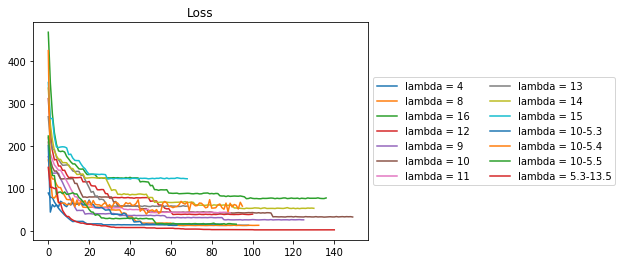

In [5]:
# GoogleNet 5.3 confloss v1.0 mainly
# Differences: lambdas, googlenet versions (5.3,5.4,5.5), confloss v3.0 (-13.5)

gn_12_441 = load_json_from_file("stats/stats-GoogleNet_1.2-4.41.json")
gn_53_13128 = "stats/stats-GoogleNet_5.3-13.128.json"

name = "stats/stats-GoogleNet_5.2-13.121.json"
fname = [name.replace("121",str(i)) for i in range(122,125)]
fname.extend([name.replace("121",str(i)) for i in range(126, 130)])
fname.extend([name.replace("121",str(i)) for i in range(1211, 1214)])

fname.append(gn_53_13128)
fname.append(gn_53_13128.replace("_5.3", "_5.4"))
fname.append(gn_53_13128.replace("_5.3", "_5.5"))
fname.append(gn_53_13128.replace("-13.128", "-13.5"))

lambdas = [4,8,16,12,9,10,11,13,14,15, "10-5.3", "10-5.4", "10-5.5", "5.3-13.5"]

gns = [load_json_from_file(f) for f in fname]

Train_Accs = {"lambda = "+str(lambdas[i]): gns[i]['TrainAcc'] for i in range(len(gns))}

Train_Accs['og GN'] = gn_12_441['TrainAcc']

Valid_Accs = {"lambda = "+str(lambdas[i]): gns[i]['ValidAcc'] for i in range(len(gns))}

Valid_Accs['og GN'] = gn_12_441['ValidAcc']

avg_conf = {"lambda = "+str(lambdas[i]): gns[i]['avg_confidence'] for i in range(len(gns))}

train_drop = {"lambda = "+str(lambdas[i]): gns[i]['train_drop'] for i in range(len(gns))}
train_drop['max'] = [20*30*0.6 for x in range(len(train_drop['lambda = '+str(lambdas[0])]))]

valid_drop = {"lambda = "+str(lambdas[i]): gns[i]['valid_drop'] for i in range(len(gns))}
valid_drop['max'] = [20*30*0.2 for x in range(len(valid_drop['lambda = '+str(lambdas[0])]))]

class_loss = {"lambda = "+str(lambdas[i]): gns[i]['class_loss'] for i in range(len(gns))}
class_loss['og GN'] = gn_12_441['loss']

overall_loss = {"lambda = "+str(lambdas[i]): gns[i]['loss'] for i in range(len(gns))}


Metrics.plot_series(Train_Accs, "Train_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(Valid_Accs, "Valid_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(13, True, "avg"))
Metrics.plot_series(avg_conf, "Avg_Confidence", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(9, True,"avg"))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(9, True, "avg"))
Metrics.plot_series(class_loss, "Class_Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(overall_loss, "Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))

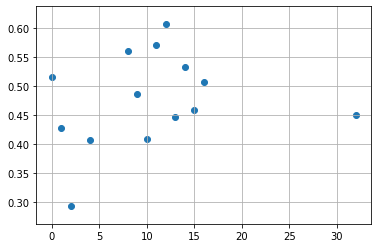

In [24]:
y = [stats['TestAcc'] for stats in gns]
y.pop()
y.append(gn_12_441['TestAcc'])
x = lambdas.copy()
x.pop()
x.append(0)

plt.scatter(x,y)
plt.grid(b=True, which='both')

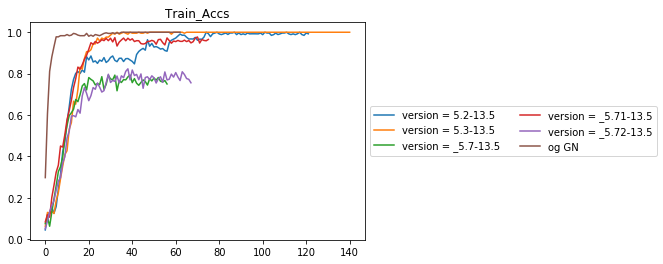

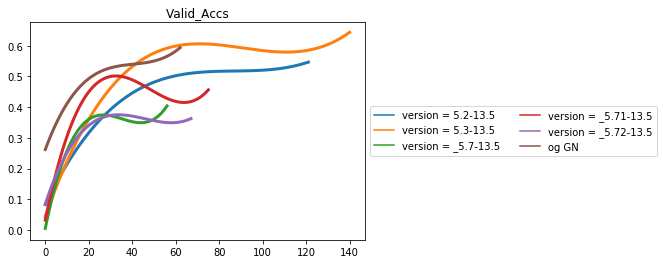

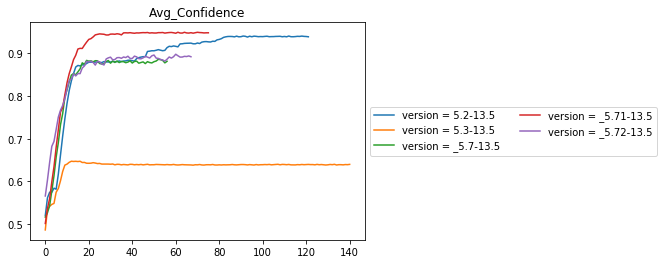

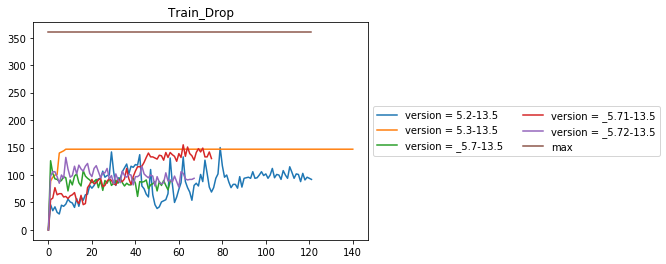

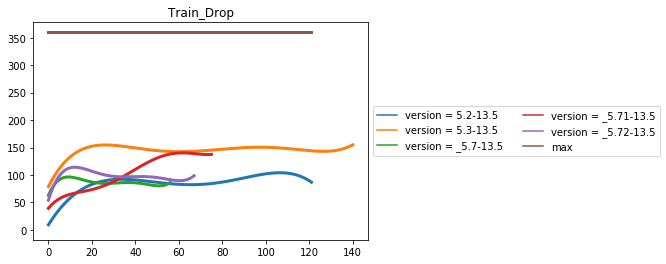

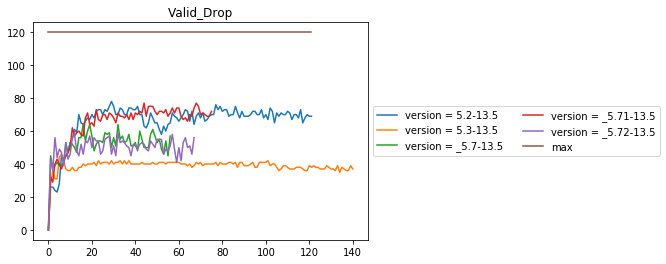

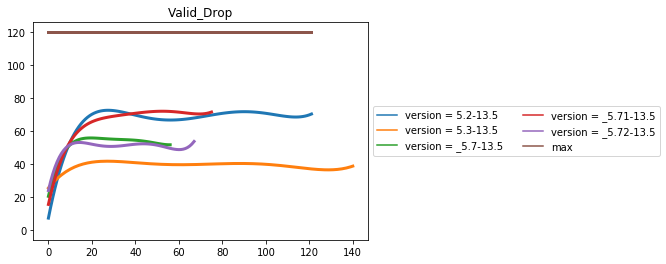

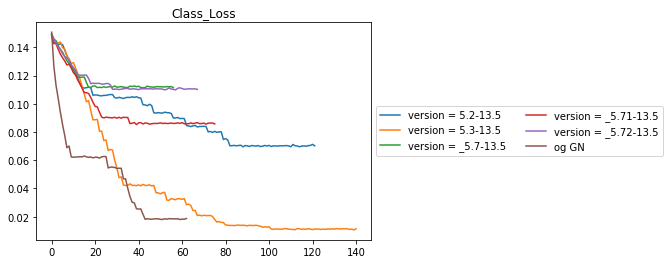

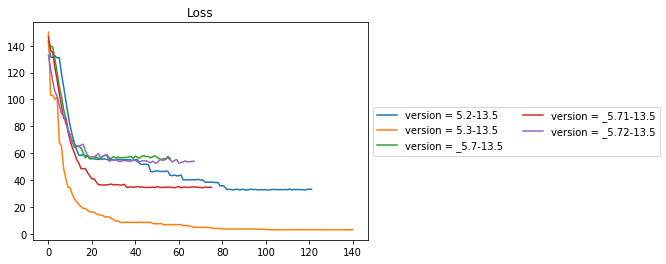

5.2-13.5 test acc: 0.5263157894736842
5.2-13.5 Test dropped: 82 / 120.0
5.3-13.5 test acc: 0.5
5.3-13.5 Test dropped: 38 / 120.0
_5.7-13.5 test acc: 0.28
_5.7-13.5 Test dropped: 70 / 120.0
_5.71-13.5 test acc: 0.2564102564102564
_5.71-13.5 Test dropped: 81 / 120.0
_5.72-13.5 test acc: 0.25
_5.72-13.5 Test dropped: 52 / 120.0


In [30]:
gn_12_441 = load_json_from_file("stats/stats-GoogleNet_1.2-4.41.json")
name = "stats/stats-GoogleNet_5.2-13.5.json"
fname = [name.replace("_5.2", i) for i in ["_5.2", "_5.3","_5.7","_5.71","_5.72"]]
version = ["5.2-13.5", "5.3-13.5","_5.7-13.5","_5.71-13.5","_5.72-13.5"]

gns = [load_json_from_file(f) for f in fname]

Train_Accs = {"version = "+str(version[i]): gns[i]['TrainAcc'] for i in range(len(gns))}
Train_Accs['og GN'] = gn_12_441['TrainAcc']

Valid_Accs = {"version = "+str(version[i]): gns[i]['ValidAcc'] for i in range(len(gns))}
Valid_Accs['og GN'] = gn_12_441['ValidAcc']

avg_conf = {"version = "+str(version[i]): gns[i]['avg_confidence'] for i in range(len(gns))}

train_drop = {"version = "+str(version[i]): gns[i]['train_drop'] for i in range(len(gns))}
train_drop['max'] = [20*30*0.6 for x in range(len(train_drop['version = '+str(version[0])]))]

valid_drop = {"version = "+str(version[i]): gns[i]['valid_drop'] for i in range(len(gns))}
valid_drop['max'] = [20*30*0.2 for x in range(len(valid_drop['version = '+str(version[0])]))]

class_loss = {"version = "+str(version[i]): gns[i]['class_loss'] for i in range(len(gns))}
class_loss['og GN'] = gn_12_441['loss']

overall_loss = {"version = "+str(version[i]): gns[i]['loss'] for i in range(len(gns))}


Metrics.plot_series(Train_Accs, "Train_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(Valid_Accs, "Valid_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(3, False))
Metrics.plot_series(avg_conf, "Avg_Confidence", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(class_loss, "Class_Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(overall_loss, "Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))

for i in range(len(gns)):
    print(version[i], "test acc:", gns[i]["TestAcc"])
    print(version[i],"Test dropped:", len(gns[i]['Test_dropped_fnames']),"/", 20*30*0.2)


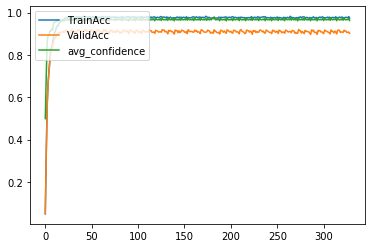

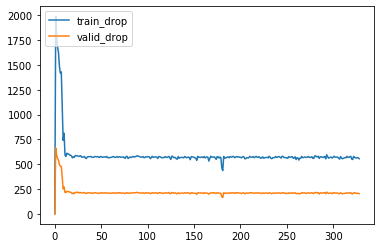

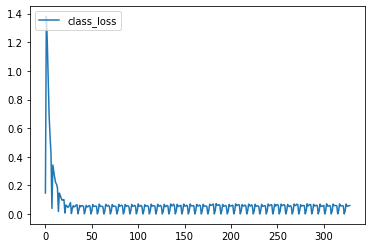

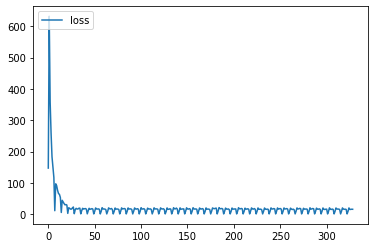

testAcc 0.9129583481666074
Test dropped: 212 / 6000.0


In [25]:
stats = load_json_from_file("stats/stats-GoogleNet_5.3-13.52.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)

print("Test dropped:", len(stats['Test_dropped_fnames']),"/", 1000*30*0.2)

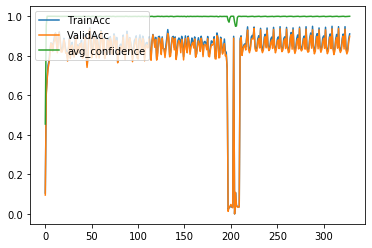

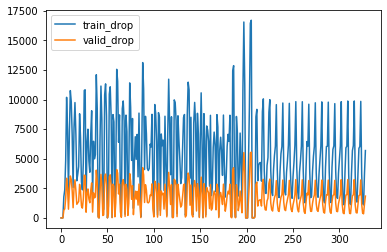

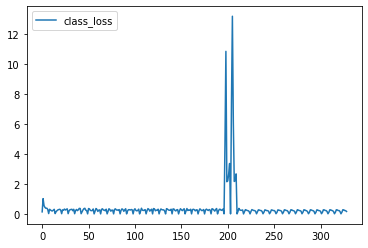

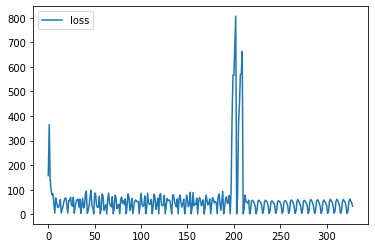

testAcc 0.8274074074074074
Test dropped: 1780 / 6000.0


In [24]:
stats = load_json_from_file("stats/stats-GoogleNet_5.3-13.522.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)

print("Test dropped:", len(stats['Test_dropped_fnames']),"/", 1000*30*0.2)

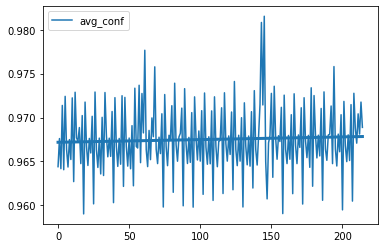

In [16]:
x = {'avg_conf':accs['avg_confidence'][100:]}

Metrics.plot_series(x, show_avgs=1).py

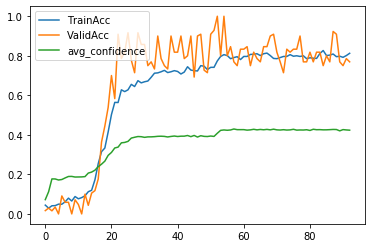

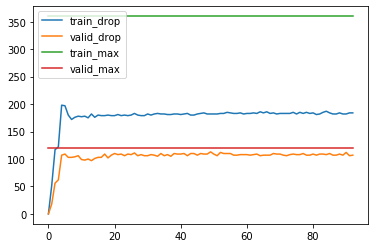

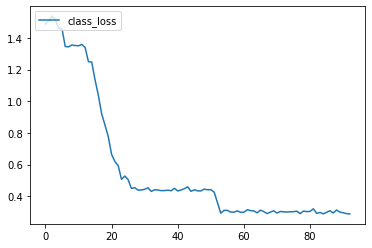

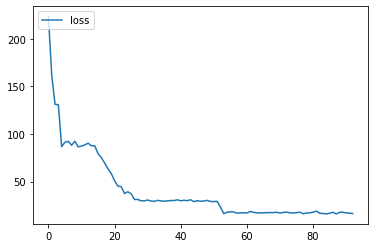

testAcc 0.8571428571428571


In [11]:
stats = load_json_from_file("stats/stats-GoogleNet_5.5-13.128.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}
drops['train_max'] = [20*30*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [20*30*0.2 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)


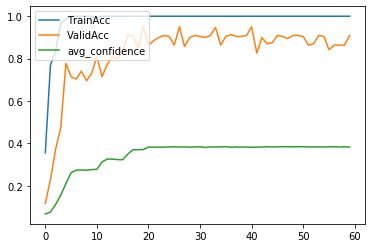

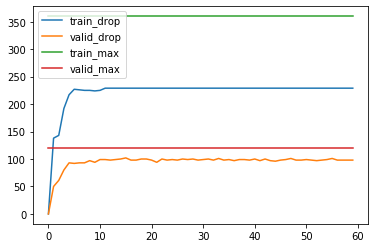

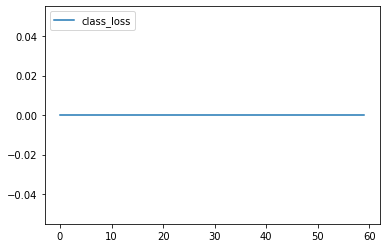

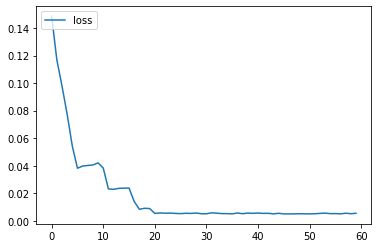

testAcc 0.4666666666666667


In [12]:
stats = load_json_from_file("stats/stats-GoogleNet_5.5-13.4.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}
drops['train_max'] = [20*30*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [20*30*0.2 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)


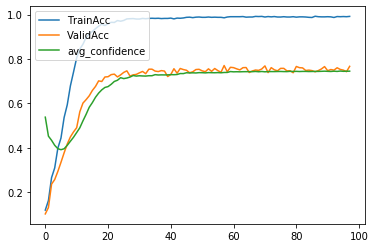

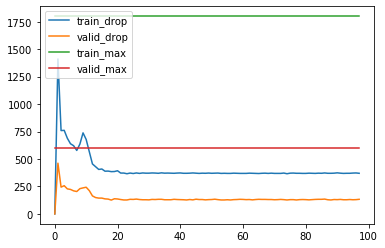

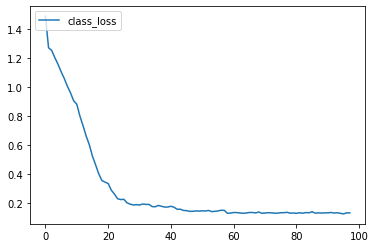

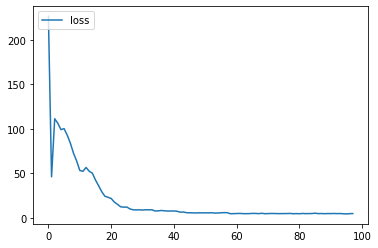

testAcc 0.7801268498942917


In [11]:
stats = load_json_from_file("stats/stats-GoogleNet_5.3-13.3.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}
drops['train_max'] = [100*30*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [100*30*0.2 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)


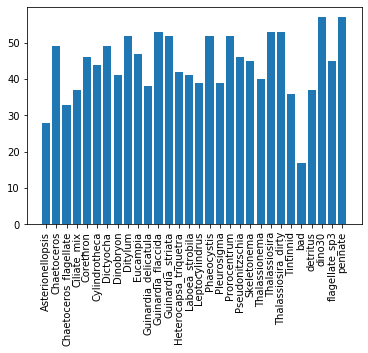

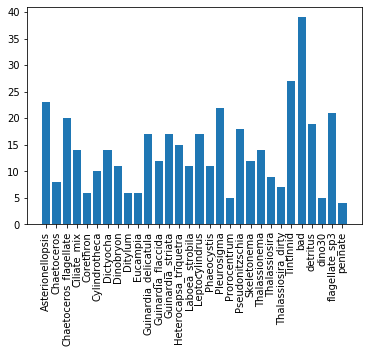

In [ ]:
dropped_train.sample()

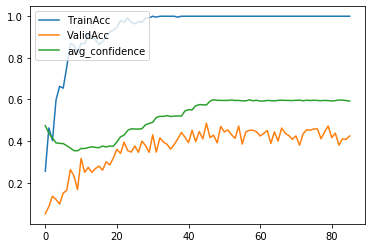

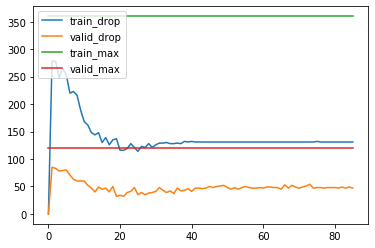

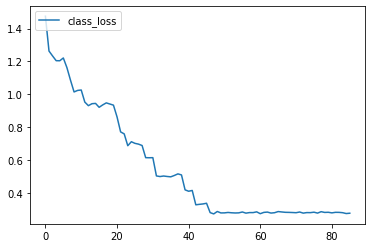

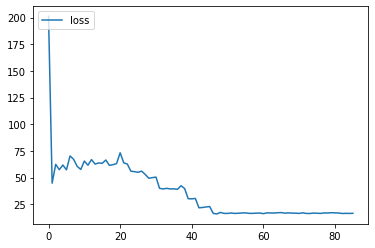

testAcc 0.46153846153846156


In [13]:
stats = load_json_from_file("stats/stats-GoogleNet_5.3-13.128.json")

accs = {'TrainAcc': stats['TrainAcc'], 'ValidAcc': stats['ValidAcc'], 
        'avg_confidence': stats['avg_confidence']}
loss = {'loss':stats['loss']}
class_loss = {'class_loss':stats['class_loss']}
drops = {'train_drop': stats['train_drop'], 'valid_drop': stats['valid_drop']}
drops['train_max'] = [20*30*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [20*30*0.2 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(class_loss)
Metrics.plot_series(loss)

y = stats['TestAcc']
print("testAcc", y)


In [ ]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.12-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

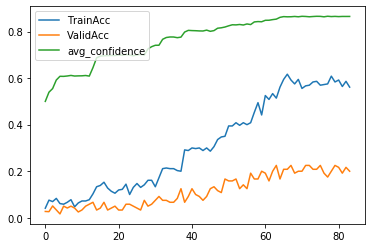

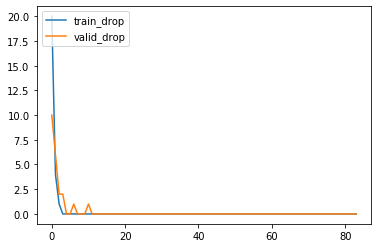

In [7]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.13-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

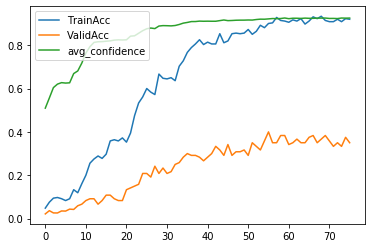

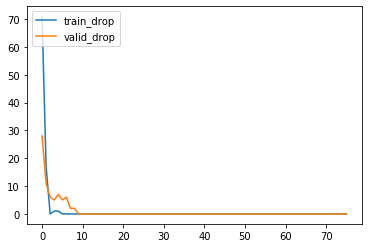

In [8]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.14-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

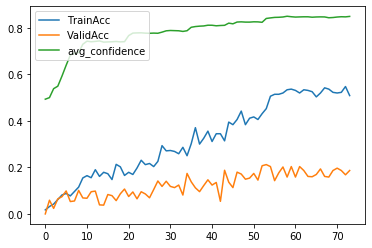

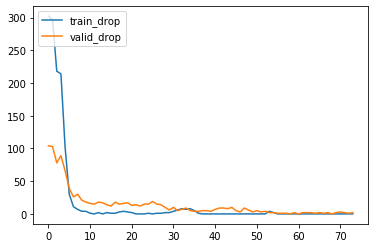

In [9]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.15-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

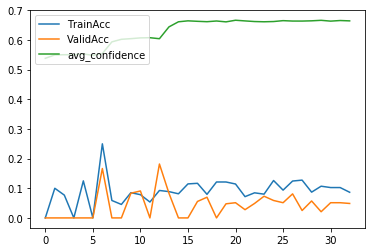

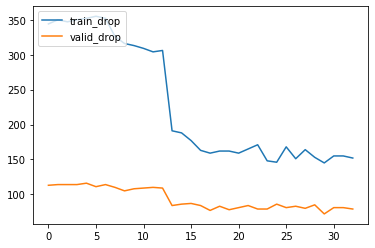

In [11]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.16-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

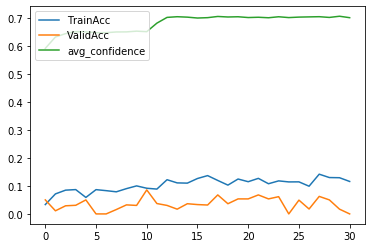

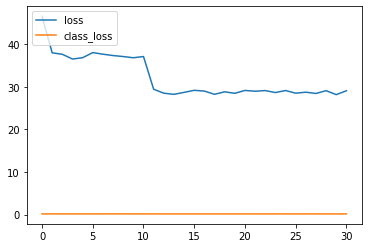

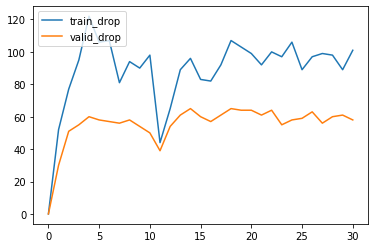

In [19]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

losses = drops.copy()
del losses['train_drop']
del losses['valid_drop']

del drops['loss']
del drops['class_loss']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']
del gn_50_131['loss']
del gn_50_131['class_loss']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(losses)
Metrics.plot_series(drops)

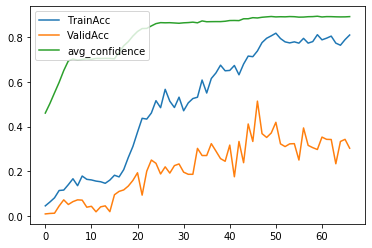

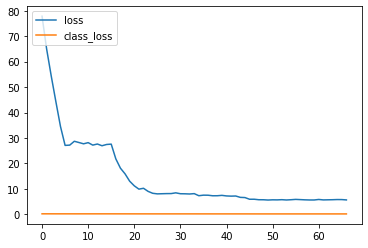

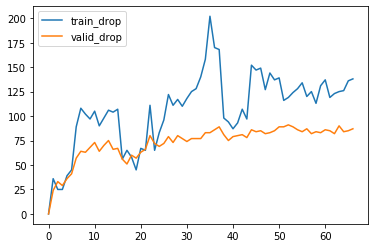

In [21]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

losses = drops.copy()
del losses['train_drop']
del losses['valid_drop']

del drops['loss']
del drops['class_loss']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']
del gn_50_131['loss']
del gn_50_131['class_loss']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(losses)
Metrics.plot_series(drops)

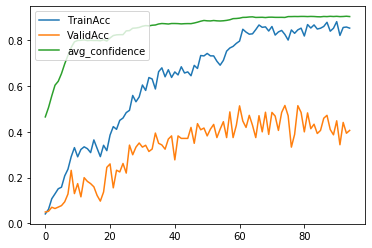

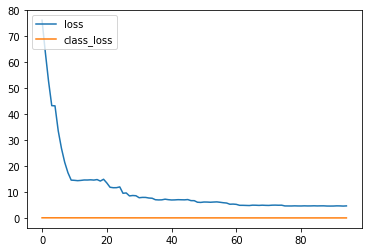

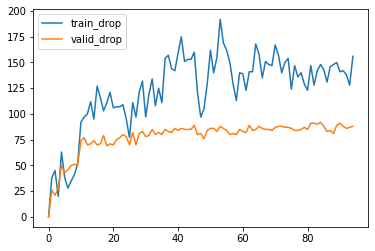

In [22]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.1.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

losses = drops.copy()
del losses['train_drop']
del losses['valid_drop']

del drops['loss']
del drops['class_loss']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']
del gn_50_131['loss']
del gn_50_131['class_loss']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(losses)
Metrics.plot_series(drops)

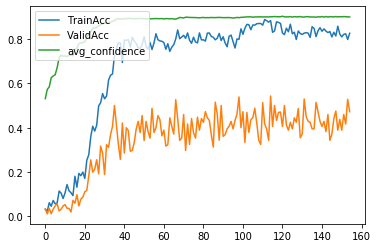

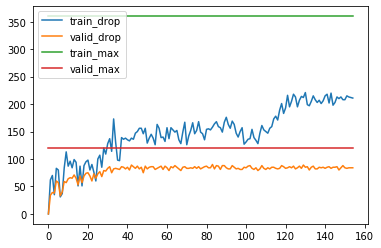

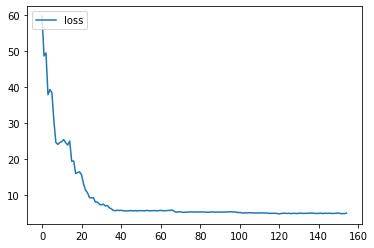

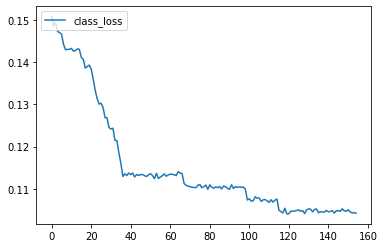

In [29]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.12.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence']}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

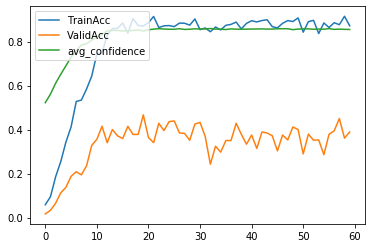

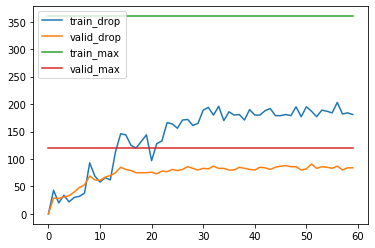

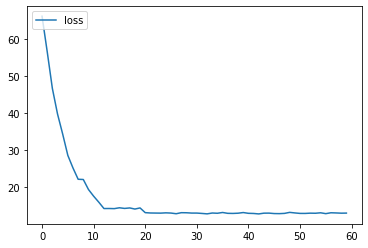

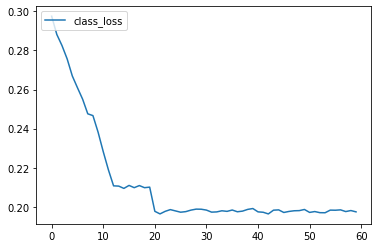

In [30]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.121.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence']}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

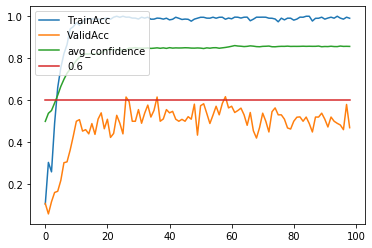

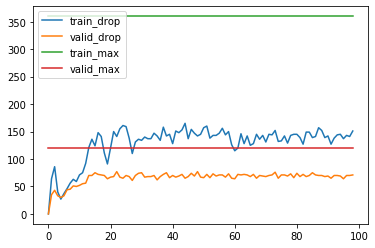

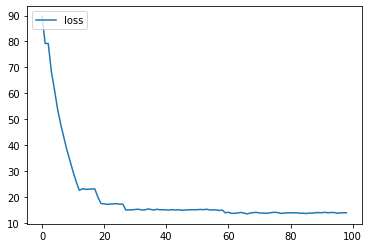

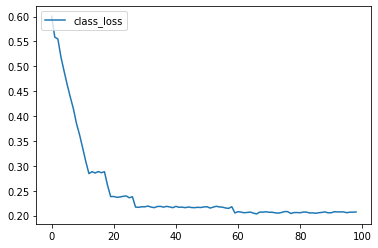

In [37]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.122.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence'], '0.6': [0.6 for x in range(len(gn_50_131['TrainAcc']))]}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

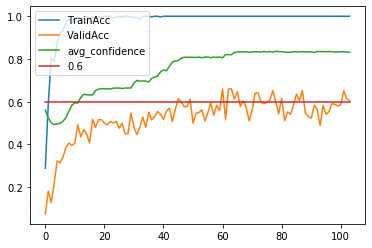

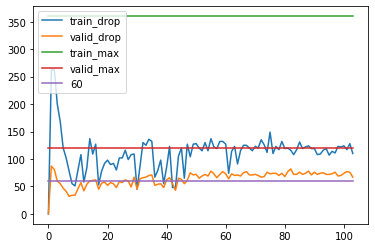

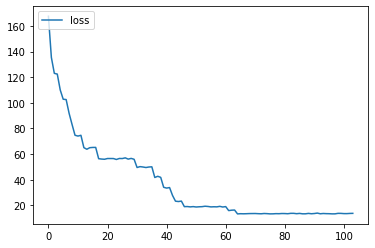

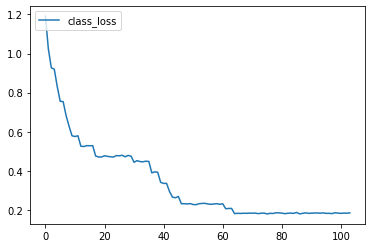

In [41]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.123.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence'], '0.6': [0.6 for x in range(len(gn_50_131['TrainAcc']))]}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]
drops['60'] = [60 for x in range(len(drops['train_drop']))]

Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

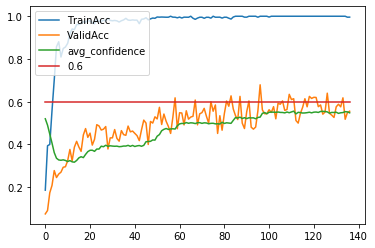

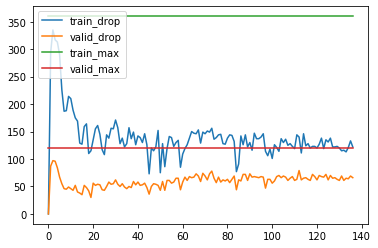

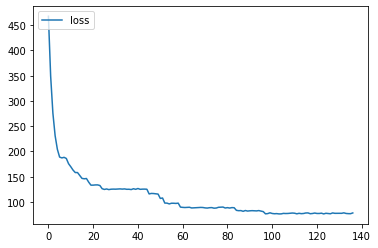

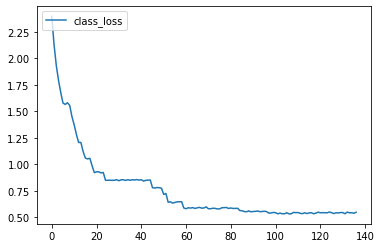

In [39]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.124.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence'], '0.6': [0.6 for x in range(len(gn_50_131['TrainAcc']))]}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

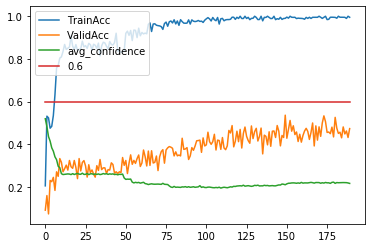

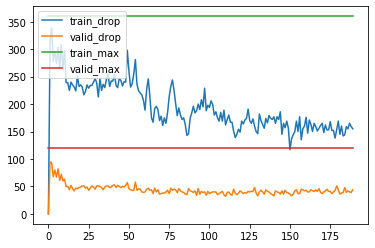

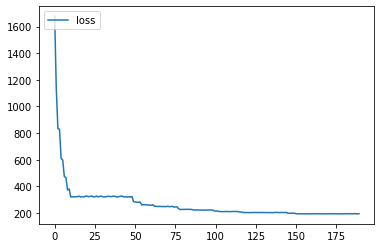

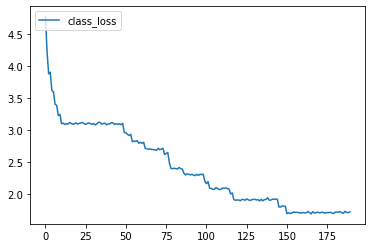

In [40]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.125.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence'], '0.6': [0.6 for x in range(len(gn_50_131['TrainAcc']))]}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

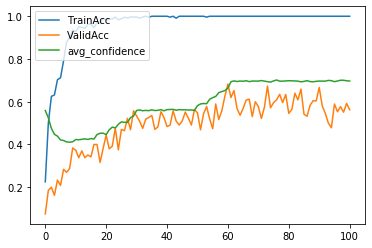

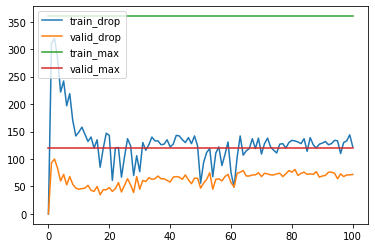

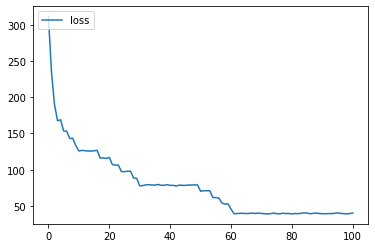

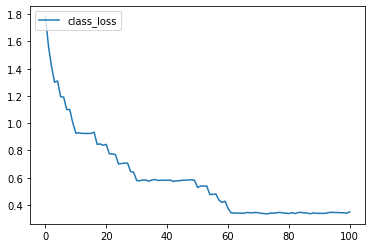

In [35]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.126.json")

accs = {'TrainAcc': gn_50_131['TrainAcc'], 'ValidAcc': gn_50_131['ValidAcc'], 
        'avg_confidence': gn_50_131['avg_confidence']}
loss = {'loss':gn_50_131['loss']}
class_loss = {'class_loss':gn_50_131['class_loss']}
drops = {'train_drop': gn_50_131['train_drop'], 'valid_drop': gn_50_131['valid_drop']}
drops['train_max'] = [600*0.6 for x in range(len(drops['train_drop']))]
drops['valid_max'] = [600*0.2 for x in range(len(drops['train_drop']))]


Metrics.plot_series(accs)
Metrics.plot_series(drops)
Metrics.plot_series(loss)
Metrics.plot_series(class_loss)

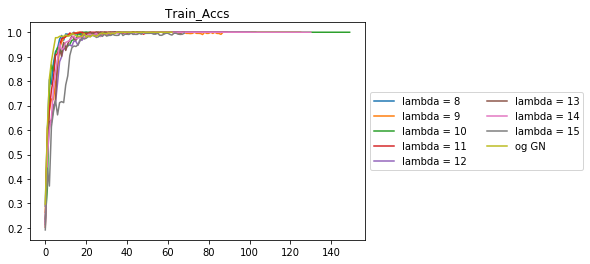

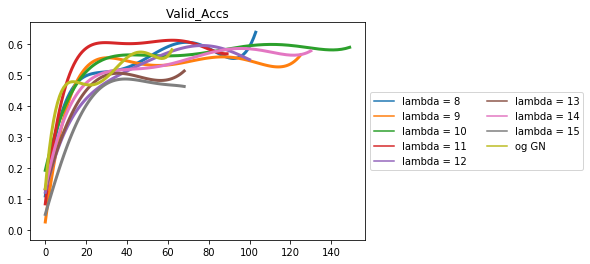

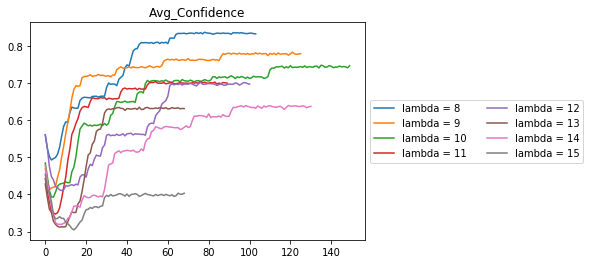

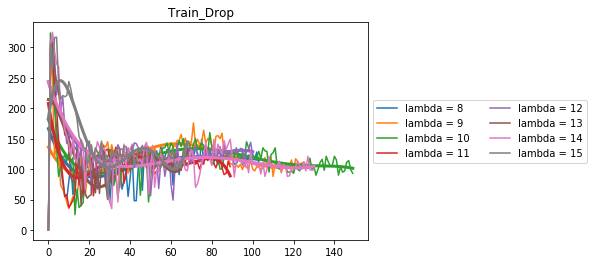

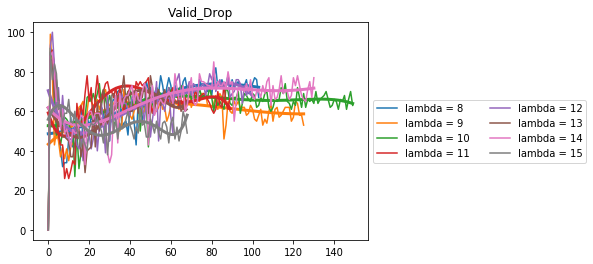

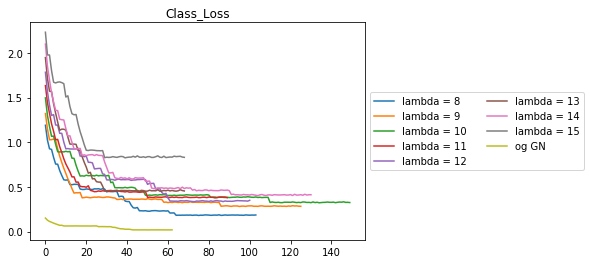

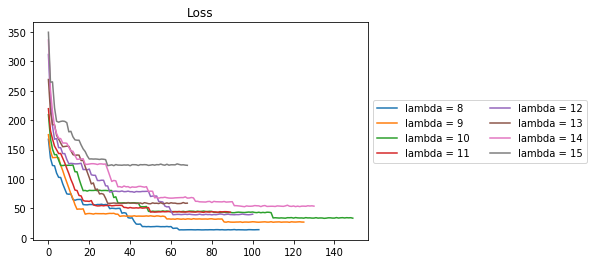

In [5]:
gn_12_441 = load_json_from_file("stats/stats-GoogleNet_1.2-4.41.json")

name = "stats/stats-GoogleNet_5.2-13.121.json"
fname = [name.replace("121",str(i)) for i in range(127, 130)]
fname.extend([name.replace("121",str(i)) for i in range(1211, 1214)])
fname.insert(0, name.replace("121", "123"))
fname.insert(4, name.replace("121", "126"))


gns = [load_json_from_file(f) for f in fname]

Train_Accs = {"lambda = "+str(i+8): gns[i]['TrainAcc'] for i in range(len(gns))}

Train_Accs['og GN'] = gn_12_441['TrainAcc']

Valid_Accs = {"lambda = "+str(i+8): gns[i]['ValidAcc'] for i in range(len(gns))}

Valid_Accs['og GN'] = gn_12_441['ValidAcc']

avg_conf = {"lambda = "+str(i+8): gns[i]['avg_confidence'] for i in range(len(gns))}

train_drop = {"lambda = "+str(i+8): gns[i]['train_drop'] for i in range(len(gns))}

valid_drop = {"lambda = "+str(i+8): gns[i]['valid_drop'] for i in range(len(gns))}

class_loss = {"lambda = "+str(i+8): gns[i]['class_loss'] for i in range(len(gns))}
class_loss['og GN'] = gn_12_441['loss']

overall_loss = {"lambda = "+str(i+8): gns[i]['loss'] for i in range(len(gns))}



Metrics.plot_series(Train_Accs, "Train_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(Valid_Accs, "Valid_Accs", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=(5, False))
Metrics.plot_series(avg_conf, "Avg_Confidence", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(train_drop, "Train_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=5)
Metrics.plot_series(valid_drop, "Valid_Drop", Lloc="center left", Lncol=2, Lbbox=(1,0.5), show_avgs=5)
Metrics.plot_series(class_loss, "Class_Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))
Metrics.plot_series(overall_loss, "Loss", Lloc="center left", Lncol=2, Lbbox=(1,0.5))


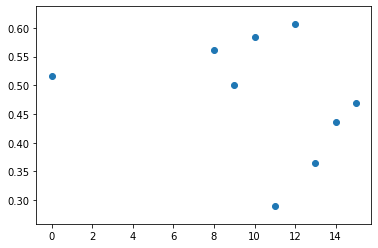

In [65]:
import matplotlib.pyplot as plt

y = [stats['TestAcc'] for stats in gns]
y.append(gn_12_441['TestAcc'])
x = [(i+8) for i in range(len(gns))]

x.append(0)
plt.scatter(x,y)



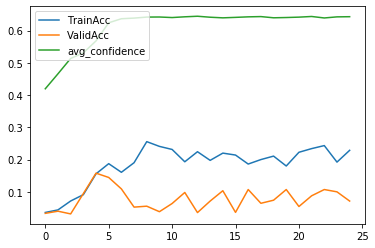

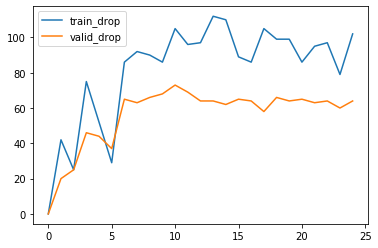

In [23]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.11.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

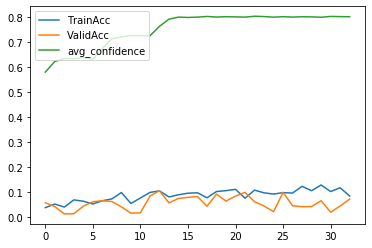

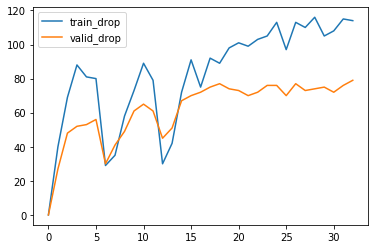

In [20]:
gn_50_131 = load_json_from_file("stats/stats-GoogleNet_5.2-13.2.json")
del gn_50_131['Time']
del gn_50_131['Epochs']
del gn_50_131['TestAcc']
del gn_50_131['Test_Pred']
del gn_50_131['Test_Target']
del gn_50_131['Test_fnames']

drops = gn_50_131.copy()
del drops['TrainAcc']
del drops['ValidAcc']
del drops['avg_confidence']

del gn_50_131['train_drop']
del gn_50_131['valid_drop']

Metrics.plot_series(gn_50_131)
Metrics.plot_series(drops)

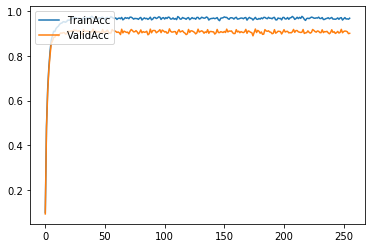

0.9105


In [16]:
ae_21_101 = load_json_from_file("stats/stats-GoogleNet_1.3-4.2.json")
train_val = {'TrainAcc': ae_21_101['TrainAcc'], 'ValidAcc': ae_21_101['ValidAcc']}
Metrics.plot_series(train_val)

print(ae_21_101['TestAcc'])

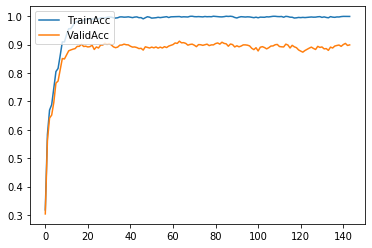

0.9128847157016171


In [17]:
ae_21_101 = load_json_from_file("stats/stats-GoogleNet_1.2-4.2.json")
train_val = {'TrainAcc': ae_21_101['TrainAcc'], 'ValidAcc': ae_21_101['ValidAcc']}
Metrics.plot_series(train_val)

print(ae_21_101['TestAcc'])